<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style="font-weight: normal;"><a href="#3">Modeling & Evaluation</a></span></li>
  <ol style="list-style-type:lower-alpha;">
    <li><span style="font-weight: normal;"><a href="#definition-of-the-problem--metrics-for-evaluation">Definition of the Problem & Metrics for Evaluation</a></span></li>
  </ol>
  <br>
  <ol style="list-style-type:alpha;">
    <li><span style="font-weight: normal;"><a href="#logistic-regression">Logistic Regression</a></span></li>
    <li><span style="font-weight: normal;"><a href="#naive-bayes">Naive Bayes</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#naive-bayes-categorical">Naive Bayes - Categorical</a></span></li>
      <li><span style="font-weight: normal;"><a href="#naive-bayes-gaussian">Naive Bayes - Gaussian</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#knn">K-Nearest Neighbors</a></span></li>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#knn-brute-force">KNN - Brute Force</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-kd-tree">KNN - KD Tree</a></span></li>
      <li><span style="font-weight: normal;"><a href="#knn-ball-tree">KNN - Ball Tree</a></span></li>
    </ol>
    <li><span style="font-weight: normal;"><a href="#neural-network">Neural Network</a></span></li>
    <li><span style="font-weight: normal;"><a href="#decision-tree">Decision Tree</a></span></li>
    <li><span style="font-weight: normal;"><a href="#random-forest">Random Forest</a></span></li>
    <li><span style="font-weight: normal;"><a href="#svm">Support Vector Machine</a></span></li>
    <li><span style="font-weight: normal;"><b>Ensemble Models</b></span>
    <ol style="list-style-type:lower-roman;">
      <li><span style="font-weight: normal;"><a href="#gradient-boosting">Gradient Boosting</a></span></li>
      <li><span style="font-weight: normal;"><a href="#bagging">Bagging</a></span></li>
      <li><span style="font-weight: normal;"><a href="#catboost">CatBoost</a></span></li>
      <li><span style="font-weight: normal;"><a href="#stacking">Stacking</a></span></li>
  </ol> <br>
  <ol style="list-style-type:decimal;">
    <li><span style="font-weight: normal;"><a href="#3_1">Model Selection</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_2">Model Evaluation</a></span></li>
    <li><span style="font-weight: normal;"><a href="#3_3">Model Optimization</a></span></li>
  </ol>
  <li><span style="font-weight: normal;"><a href="#📊-feature-importance">Feature Importance</a></span></li>
  <li><span style="font-weight: normal;"><a href="#🔮-test-data-prediction">Test Data Prediction</a></span></li>
  <li><span style="font-weight: normal;"><a href="#📋-csv-export---submission">CSV Export - Submission [Kaggle]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-interpretability-and-explanability-open-ended-section">Interpretability and Explanability [Open-Ended Section]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-save-model-pickle-open-ended-section">Save Model (Pickle) [Open-Ended Section]</a></span></li>
  <li><span style="font-weight: normal;"><a href="#-bibliographyreferences">Bibliography/References</a></span></li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [ ]:
# !pip install catboost
# !pip install fastparquet

In [3]:
!pip install fastparquet

In [50]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# For treating imbalanced data
from imblearn.over_sampling import KMeansSMOTE

# For modeling
import time
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, ExtraTreesClassifier

# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_validate, learning_curve
from sklearn.model_selection import PredefinedSplit
from tqdm import tqdm                         # For progress bar

# Disable warnings [DataConversionWarning & ConvergenceWarning & FutureWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

from fastparquet import *

In [52]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """
    :param args: Variable number of DataFrame objects to be displayed side by side.
    :param super_title: The main title to be displayed at the top of the combined view.
    :param titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.
    
    :return: None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## **🧮 Import Databases**

In [54]:
# ------------------------------------------------- Importing the dataset -------------------------------------------------
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/test_data.parquet')

# Load the target variable after feature engineering
y_train = pd.read_parquet('data/2ndNotebook/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/y_val.parquet').squeeze()       # .squeeze() to convert to Series


# Check the shape of the training, validation and test data (Features - X)
print(X_train.shape, X_val.shape, test_data.shape)

# Check the shape of the training, validation and test data (Target - y)
print('\n',y_train.shape, y_val.shape)

(430519, 145) (143507, 145) (387975, 145)

 (430519,) (143507,)


In [5]:
# Display the first 2 rows of each dataset
# X_train.head(2) 

In [6]:
# test_data.head(2)

In [7]:
# y_train.head(2)

In [8]:
# X_train.head(2)

In [56]:
# Drop features based on Feature Selection [2nd Notebook]
columns_to_keep = [
    "Age at Injury Clean",
    "Assembly Date Year",
    "C-2 Date Year",
    "Accident Date Binary",
    "Alternative Dispute Resolution_Y",
    "Attorney/Representative_Y",
    "C-2 Date Binary",
    "C-3 Date Binary",
    "COVID-19 Indicator_Y",
    "Carrier Type Bucket_1A. PRIVATE",
    "Carrier Type Bucket_2A. SIF",
    "Carrier Type Bucket_3A. SELF PUBLIC",
    "Carrier Type Bucket_4A. SELF PRIVATE",
    "Carrier Type Bucket_5A-5C. SPECIAL FUND",
    "District Name_NYC",
    "First Hearing Date Binary",
    "Gender_M",
    "IME-4 Reported",
    "Industry Code Description_CONSTRUCTION",
    "Industry Code Description_PUBLIC ADMINISTRATION",
    "Industry Code Description_Unknown",
    "WCIO Cause of Injury Bucket_3 - Cut",
    "WCIO Cause of Injury Bucket_6 - Strain_data",
    "WCIO Nature of Injury Bucket_1 - Specific",
    "WCIO Nature of Injury Bucket_2 - Occupational/Cumulative",
    "WCIO Nature of Injury Bucket_3 - Multiple",
    "WCIO Part of Body Bucket_III - Upper Extremities",
    "WCIO Part of Body Bucket_IV - Trunk",
    "WCIO Part of Body Bucket_V - Lower Extremities",
    "Weekly Wage Reported"
]

X_train = X_train[columns_to_keep]
X_val = X_val[columns_to_keep]
test_data = test_data[columns_to_keep]

# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, test_data.shape)

print('\n',y_train.shape, y_val.shape)

(430519, 30) (143507, 30) (387975, 30)

 (430519,) (143507,)


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

In [58]:
# Palette of colors | Blues
palette = ['#002147', '#084594', '#135C9B', '#2171B5', '#4292C6', '#6BAED6', '#9ECAE1', '#C6DBEF', '#DEEBF7', '#F7FBFF']

# Dictionary Palette of colors for 'Claim Injury Type'
claim_injury_type_palette = dict(zip(sorted(y_train.unique()), palette))
claim_injury_type_palette

{1: '#002147',
 2: '#084594',
 3: '#135C9B',
 4: '#2171B5',
 5: '#4292C6',
 6: '#6BAED6',
 7: '#9ECAE1',
 8: '#C6DBEF'}

In [60]:
# Dictionary with the mapping of the predicted values
claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY", 
                                  5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

In [62]:
# Absolute and Relative Frequency of the target variable [Train & Validation]
claim_injury_type_train = y_train.value_counts().reset_index().rename(columns={'index': 'Claim Injury Type', 'count': 'n'})
claim_injury_type_train['%'] = round((claim_injury_type_train['n'] / claim_injury_type_train['n'].sum()) * 100, 2)

claim_injury_type_val = y_val.value_counts().reset_index().rename(columns={'index': 'Claim Injury Type', 'count': 'n'})
claim_injury_type_val['%'] = round((claim_injury_type_val['n'] / claim_injury_type_val['n'].sum()) * 100, 2)

# Concatenate the dataframes
claim_injury_type_freq = pd.concat([claim_injury_type_train.set_index('Claim Injury Type'), claim_injury_type_val.set_index('Claim Injury Type')], axis=1, keys=["Train", "Validation"])
claim_injury_type_freq

Train        Validation       
                        n      %          n      %
Claim Injury Type                                 
2                  218308  50.71      72770  50.71
4                  111380  25.87      37127  25.87
3                   51679  12.00      17227  12.00
5                   36210   8.41      12070   8.41
1                    9358   2.17       3119   2.17
6                    3158   0.73       1053   0.73
8                     353   0.08        117   0.08
7                      73   0.02         24   0.02

## **📈📉 Data Normalization**

In [65]:
# Descriptive statistics of the training data after feature engineering
# X_train.describe()

> For **Modeling & Evaluation**, we will normalize the data using the **`StandardScaler`** and **`MinMaxScaler`** methods, to evaluate the best performance of the models.

In [67]:
# Define binary and numerical columns
binary_columns = X_train.columns[(X_train.nunique() == 2)].sort_values()
numerical_columns = X_train.columns[(X_train.nunique() > 2) & (X_train.columns.isin(binary_columns) == False)].sort_values()

print('\033[1mBinary Columns:\033[0m [', len(binary_columns), ']')
print(binary_columns)
print('\n\033[1mNumerical Columns:\033[0m [', len(numerical_columns), ']')
print(numerical_columns)

# Transform to list
binary_columns = list(binary_columns)
numerical_columns = list(numerical_columns)

# Check if the binary + numerical columns are equal to the total number of columns
print(len(binary_columns) + len(numerical_columns) == X_train.shape[1])

Binary Columns: [ 27 ]
Index(['Accident Date Binary', 'Alternative Dispute Resolution_Y',
       'Attorney/Representative_Y', 'C-2 Date Binary', 'C-3 Date Binary',
       'COVID-19 Indicator_Y', 'Carrier Type Bucket_1A. PRIVATE',
       'Carrier Type Bucket_2A. SIF', 'Carrier Type Bucket_3A. SELF PUBLIC',
       'Carrier Type Bucket_4A. SELF PRIVATE',
       'Carrier Type Bucket_5A-5C. SPECIAL FUND', 'District Name_NYC',
       'First Hearing Date Binary', 'Gender_M', 'IME-4 Reported',
       'Industry Code Description_CONSTRUCTION',
       'Industry Code Description_PUBLIC ADMINISTRATION',
       'Industry Code Description_Unknown',
       'WCIO Cause of Injury Bucket_3 - Cut',
       'WCIO Cause of Injury Bucket_6 - Strain_data',
       'WCIO Nature of Injury Bucket_1 - Specific',
       'WCIO Nature of Injury Bucket_2 - Occupational/Cumulative',
       'WCIO Nature of Injury Bucket_3 - Multiple',
       'WCIO Part of Body Bucket_III - Upper Extremities',
       'WCIO Part of Body Bu

In [68]:
# Standardize the data [For the 'KNN' and 'Logistic Regression' models, let's normalize the variables]
# Apply MinMaxScaler to the training, validation, and test data
minmax_scaler = MinMaxScaler().fit(X_train)

# Apply MinMaxScaler to all columns
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
test_data_norm = test_data.copy()

X_train_norm[:] = minmax_scaler.transform(X_train)
X_val_norm[:] = minmax_scaler.transform(X_val)
test_data_norm[:] = minmax_scaler.transform(test_data)

# Apply StandardScaler to all columns
standard_scaler = StandardScaler().fit(X_train)
X_train_stand = X_train.copy()
X_val_stand = X_val.copy()
test_data_stand = test_data.copy()

X_train_stand[:] = standard_scaler.transform(X_train)
X_val_stand[:] = standard_scaler.transform(X_val)
test_data_stand[:] = standard_scaler.transform(test_data)

# Apply RobustScaler to all columns
robust_scaler = RobustScaler().fit(X_train)
X_train_robust_scaled = X_train.copy()
X_val_robust_scaled = X_val.copy()
test_data_robust_scaled = test_data.copy()

X_train_robust_scaled[:] = robust_scaler.transform(X_train)
X_val_robust_scaled[:] = robust_scaler.transform(X_val)
test_data_robust_scaled[:] = robust_scaler.transform(test_data)

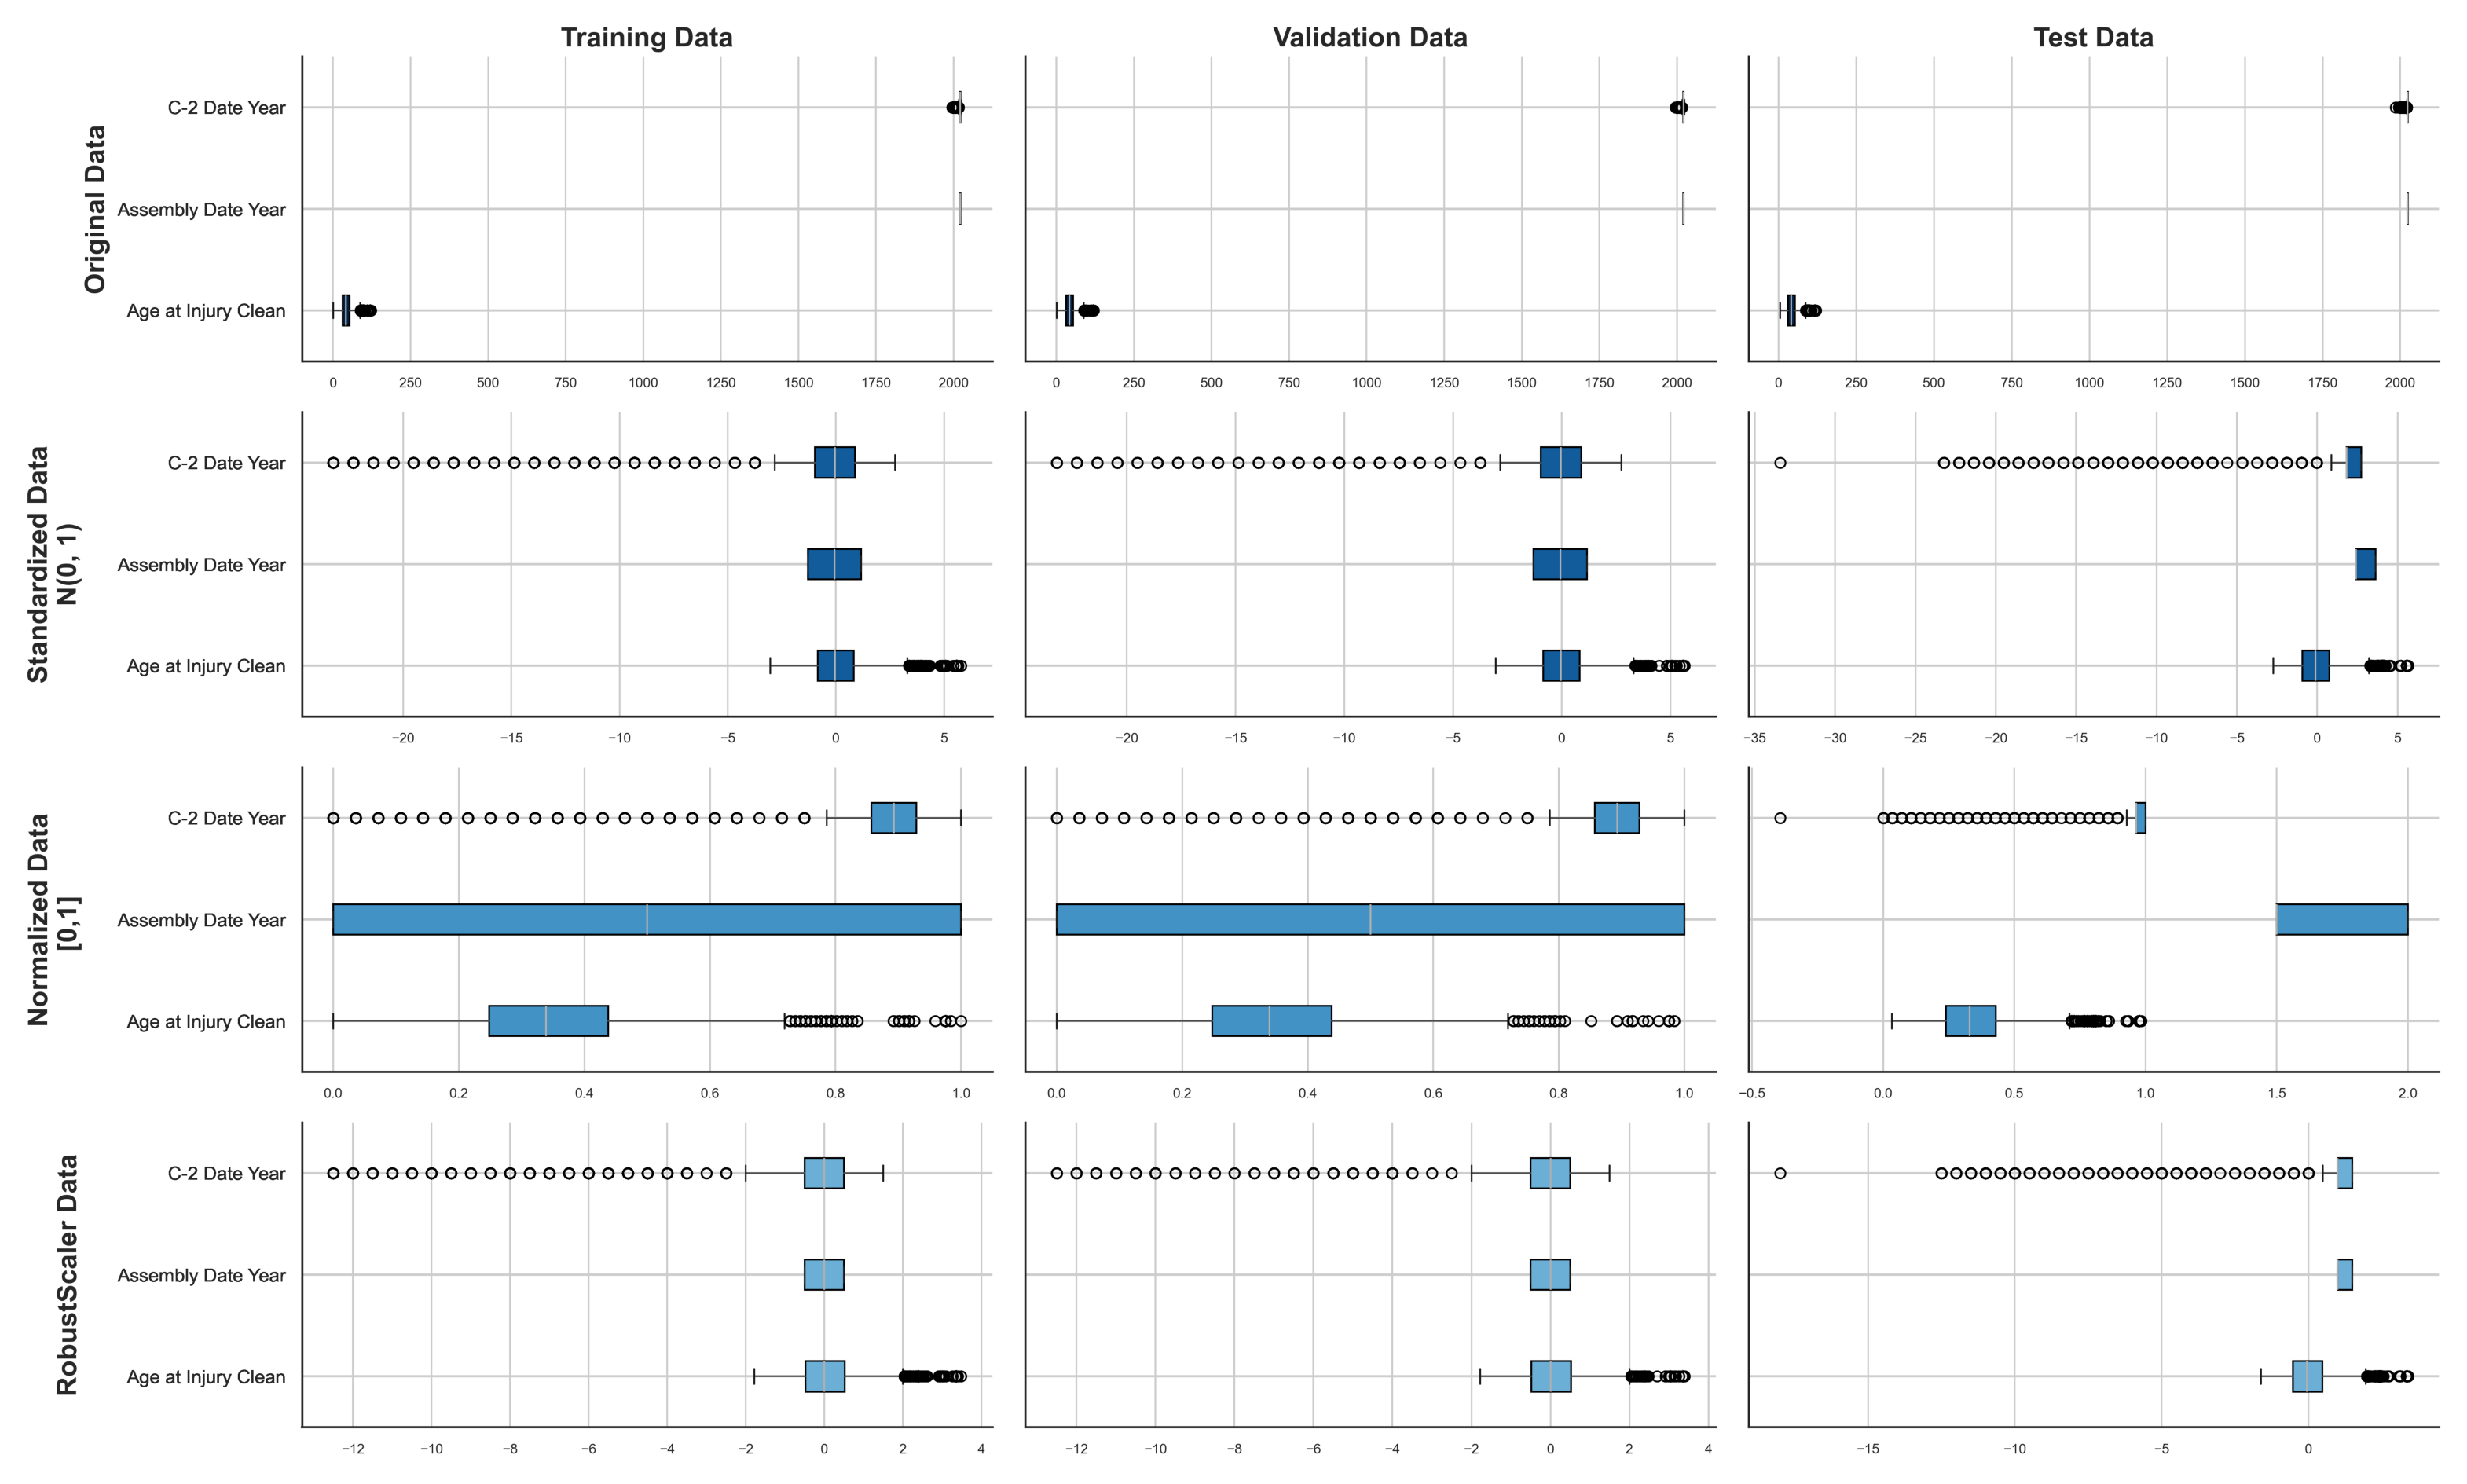

In [16]:
# Since plotting the boxplots of metric + ordinal columns for each dataset (Train, Validation, Test) with different scalers takes some time, we'll just do it if it hasn't already been saved
# Check if the file exists and if its update date is not today
file_path = './[ML]_Project_EDAOutputs_Group33/Modeling/Boxplots_ScalersTransformations.png'
if not os.path.isfile(file_path) or datetime.fromtimestamp(os.path.getmtime(file_path)).date() != datetime.today().date(): 
    
    # Plot Boxplots of Original Data, Standardized Data, Normalized Data, and Log Transformation for Train, Validation, and Test Sets
    fig, ax = plt.subplots(4, 3, figsize=(20, 12), sharey=True)  # 4 rows for each transformation and 3 columns for Train, Validation, Test

    # Define titles for columns
    col_titles = ['Training Data', 'Validation Data', 'Test Data']

    # Original Data - Train, Validation, Test
    X_train[numerical_columns].boxplot(ax=ax[0, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#002147'))
    X_val[numerical_columns].boxplot(ax=ax[0, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#002147'))
    test_data[numerical_columns].boxplot(ax=ax[0, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#002147'))
    ax[0, 0].set_ylabel('Original Data', fontsize=16, fontweight='bold')

    # Standardized Data - Train, Validation, Test
    X_train_stand[numerical_columns].boxplot(ax=ax[1, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#135C9B'))
    X_val_stand[numerical_columns].boxplot(ax=ax[1, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#135C9B'))
    test_data_stand[numerical_columns].boxplot(ax=ax[1, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#135C9B'))
    ax[1, 0].set_ylabel('Standardized Data\nN(0, 1)\n', fontsize=16, fontweight='bold')

    # Normalized Data - Train, Validation, Test
    X_train_norm[numerical_columns].boxplot(ax=ax[2, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#4292C6'))
    X_val_norm[numerical_columns].boxplot(ax=ax[2, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#4292C6'))
    test_data_norm[numerical_columns].boxplot(ax=ax[2, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#4292C6'))
    ax[2, 0].set_ylabel('Normalized Data\n[0,1] \n', fontsize=16, fontweight='bold')

    # RobustScaler Data - Train, Validation, Test
    X_train_robust_scaled[numerical_columns].boxplot(ax=ax[3, 0], vert=False, patch_artist=True, boxprops=dict(facecolor='#6BAED6'))
    X_val_robust_scaled[numerical_columns].boxplot(ax=ax[3, 1], vert=False, patch_artist=True, boxprops=dict(facecolor='#6BAED6'))
    test_data_robust_scaled[numerical_columns].boxplot(ax=ax[3, 2], vert=False, patch_artist=True, boxprops=dict(facecolor='#6BAED6'))
    ax[3, 0].set_ylabel('RobustScaler Data\n', fontsize=16, fontweight='bold')

    # Set column titles
    for col in range(3):
        ax[0, col].set_title(col_titles[col], fontsize=16, fontweight='bold')

    # Adjust x-ticks rotation
    for row in range(4):
        for col in range(3):
            ax[row, col].tick_params(axis='x', rotation=0, labelsize=8)

    # Despine and adjust layout
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    plt.show()

# Otherwise plot the saved image
else:
    plt.figure(figsize=(20, 60))
    plt.imshow(plt.imread(file_path))
    plt.axis('off')
    plt.show()

---

## **🌱 Treatment of Data Imbalance** <a class='anchor' id='data-imbalance'></a>

In [71]:
# ---------------------------------- [SMOTE] - Synthetic Minority Over-sampling Technique ----------------------------------
# Source: https://arxiv.org/abs/1106.1813
#         https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Create a directory to save the data for the 3rd notebook
if not os.path.exists('data/3rdNotebook/'):
    os.makedirs('data/3rdNotebook/')

# Check if the data after applying SMOTE is already saved [If not, apply SMOTE and save the data]
if not os.path.isfile('data/3rdNotebook/X_train_KMeansSMOTE.parquet') or not os.path.isfile('data/3rdNotebook/y_train_KMeansSMOTE.parquet'):
    # Apply KMeansSMOTE to the training data
    ksmote = KMeansSMOTE(random_state=2024, cluster_balance_threshold=0.0001, n_jobs=-1)
    X_train_smote, y_train_smote = ksmote.fit_resample(X_train, y_train)
        
    # Save the X_train_smote and y_train_smote data (After applying KMeansSMOTE)
    X_train_smote.to_parquet('data/3rdNotebook/X_train_KMeansSMOTE.parquet', engine = 'fastparquet')
    y_train_smote.to_frame().to_parquet('data/3rdNotebook/y_train_KMeansSMOTE.parquet', engine = 'fastparquet')
    
# Load the data after applying SMOTE
X_train_smote = pd.read_parquet('data/3rdNotebook/X_train_KMeansSMOTE.parquet')
y_train_smote = pd.read_parquet('data/3rdNotebook/y_train_KMeansSMOTE.parquet').squeeze()   # .squeeze() to convert to Series

# Check the shape of the training data after applying SMOTE
print(X_train_smote.shape, y_train_smote.shape)

## Time of Execution [KMeansSMOTE] = 5min 15s

(1746494, 30) (1746494,)


In [73]:
# Check if the columns are the same in the training data after applying SMOTE [Error if not]
if X_train.columns.equals(X_train_smote.columns) == False:
    raise ValueError("Columns are not the same in the training data after applying SMOTE | Please delete the saved data and rerun the code to apply SMOTE again")

In [75]:
# Check the distribution of the target variable after applying SMOTE
pd.DataFrame({
    'Original Data | n': y_train.value_counts(),
    'Original Data | %': y_train.value_counts(normalize=True).mul(100).round(2),
    'KMeansSMOTE Data | n': y_train_smote.value_counts(),
    'KMeansSMOTE Data | %': y_train_smote.value_counts(normalize=True).mul(100).round(2)
})

,Original Data | n,Original Data | %,KMeansSMOTE Data | n,KMeansSMOTE Data | %
Claim Injury Type,,,,
1,9358,2.17,218311,12.5
2,218308,50.71,218308,12.5
3,51679,12.00,218312,12.5
4,111380,25.87,218313,12.5
5,36210,8.41,218313,12.5
6,3158,0.73,218312,12.5
7,73,0.02,218312,12.5
8,353,0.08,218313,12.5


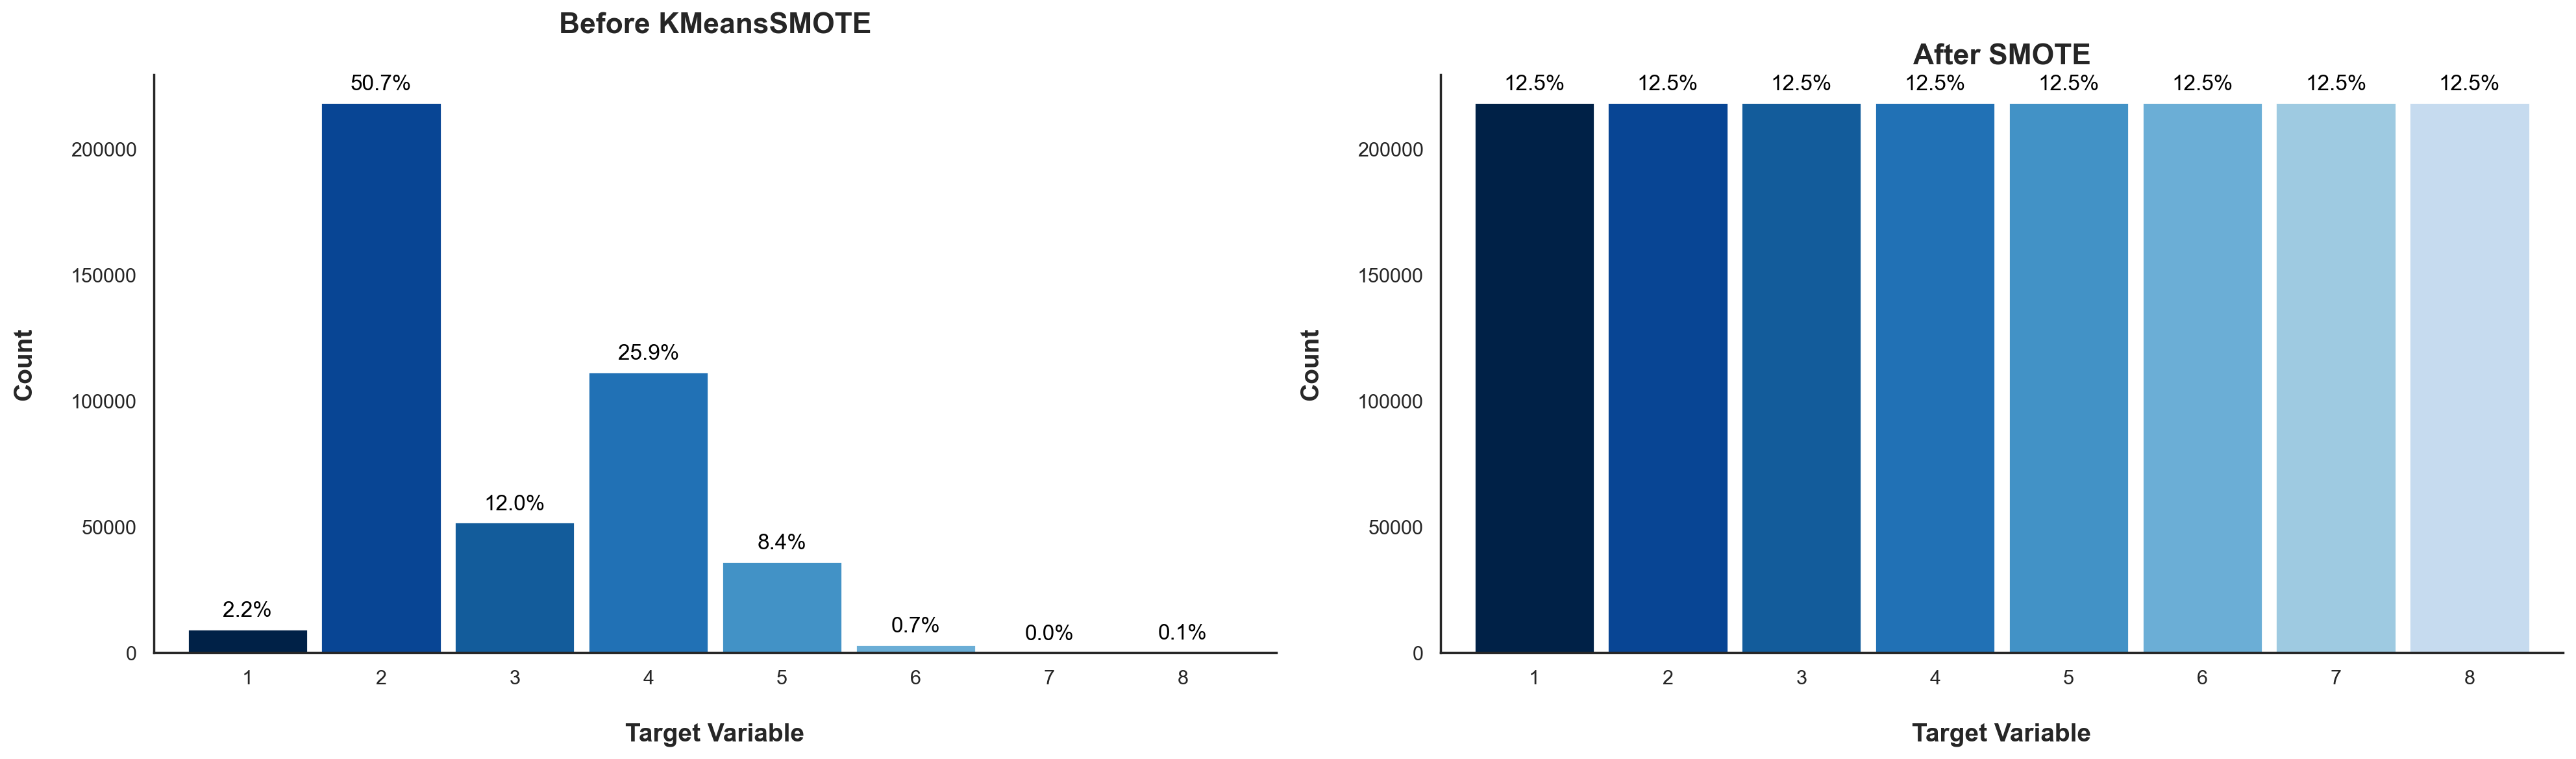

In [77]:
# Plot the distribution of the target variable before & after applying KMeansSMOTE
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Before KMeansSMOTE                                                                                  ############## NOT FINISHED ##############
y_train.value_counts().sort_index().plot(kind='bar', ax=ax[0], color=palette[:8], width=.9)
ax[0].set_title('Before KMeansSMOTE\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nTarget Variable', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Count\n', fontsize=14, fontweight='bold')
ax[0].tick_params(axis='x', rotation=0)

# Add % labels to the bars
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()/len(y_train)*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', 
                   xytext=(0, 10), textcoords='offset points')

# After KMeansSMOTE
y_train_smote.value_counts().sort_index().plot(kind='bar', ax=ax[1], color=palette[:8], width=.9)
ax[1].set_title('After SMOTE', fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nTarget Variable', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Count\n', fontsize=14, fontweight='bold')
ax[1].tick_params(axis='x', rotation=0)


# Add % labels to the bars
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()/len(y_train_smote)*100:.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=12, color='black', 
                   xytext=(0, 10), textcoords='offset points')

# Despine and adjust layout
sns.despine(top=True, right=True)
plt.tight_layout()
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/TargetDistribution_SMOTE.png', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
# Scale the data after applying SMOTE
# Apply MinMaxScaler to the training data after applying SMOTE
X_train_smote_norm = X_train_smote.copy()
X_val_smote_norm = X_val.copy()

minmax_scaler_smote = MinMaxScaler().fit(X_train_smote)
X_train_smote_norm[:] = minmax_scaler_smote.transform(X_train_smote)
X_val_smote_norm[:] = minmax_scaler_smote.transform(X_val)

# Apply StandardScaler to the training data after applying SMOTE
X_train_smote_stand = X_train_smote.copy()
X_val_smote_stand = X_val.copy()

standard_scaler_smote = StandardScaler().fit(X_train_smote)
X_train_smote_stand[:] = standard_scaler_smote.transform(X_train_smote)
X_val_smote_stand[:] = standard_scaler_smote.transform(X_val)

# Apply RobustScaler to the training data after applying SMOTE
X_train_smote_robust_scaled = X_train_smote.copy()
X_val_smote_robust_scaled = X_val.copy()

robust_scaler_smote = RobustScaler().fit(X_train_smote)
X_train_smote_robust_scaled[:] = robust_scaler_smote.transform(X_train_smote)
X_val_smote_robust_scaled[:] = robust_scaler_smote.transform(X_val)

---

# **💡 Modeling**

### **Definition of the Problem & Metrics for Evaluation**

> The problem consists of predict the WCB’s final decision on what type of injury (Claim Injury Type) should be granted. <br>
> Since the target variable is **category** and **multiclass**, we will use **Classification Models** to solve this problem.

<br>

> Since we have a **Classification Problem**, we will use the following metrics to evaluate the models **[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

- **Accuracy**: The proportion of *true results* among the *total number of cases* examined.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $$

- **Precision**: The proportion of *true positive* results among the *positive results predicted by the model*.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

- **Recall**: The proportion of *true positive* results among the *actual positive results*.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

- **F1-Score**: The harmonic mean of ***precision*** and ***recall***.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)** $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

   - **F1-Score (Macro)**: The average of the F1-Score for each class. $$ \text{F1-Score (Macro)} = \frac{1}{N} \sum_{i=1}^{N} \text{F1-Score}_i $$
   - **F1-Score (Weighted)**: The weighted average of the F1-Score for each class. $$ \text{F1-Score (Weighted)} = \frac{\sum_{i=1}^{N} \text{F1-Score}_i \times \text{Support}_i}{\sum_{i=1}^{N} \text{Support}_i} $$ <br> Where $\text{Support}_i$ is the number of occurrences of class $i$ in the dataset and $N$ is the number of classes. <br> <br> <br>
   - **F1-Score (Micro)**: The F1-Score for the entire dataset. $$ \text{F1-Score (Micro)} = \frac{\sum_{i=1}^{N} \text{TP}_i}{\sum_{i=1}^{N} \text{TP}_i + \frac{1}{2} \times \left( \sum_{i=1}^{N} \text{FP}_i + \sum_{i=1}^{N} \text{FN}_i \right)} $$ <br> Where $\text{TP}_i$, $\text{FP}_i$, and $\text{FN}_i$ are the ***True Positive***, ***False Positive***, and ***False Negative*** for class $i$, respectively. <br> <br>

- **Confusion Matrix**: A table that is often used to describe the performance of a classification model on a set of data for which the true values are known.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**
  - **True Positive (TP)**: The number of correct positive predictions.   
  - **True Negative (TN)**: The number of correct negative predictions.
  - **False Positive (FP)**: The number of incorrect positive predictions.
  - **False Negative (FN)**: The number of incorrect negative predictions.


<style>
.tablecustom {
    border-collapse: collapse;
    width: 100%;
    font-size: 16px;
}

.tablecustom td, .tablecustom th {
    border: 2px solid #ddd;
    padding: 8px;
}

.tablecustom tr:nth-child(1) th {
    background-color: #e0e0e0; /* Header row background */
    font-weight: bold;
    color: #000;
}
.tablecustom th:first-child, .tablecustom td:first-child {
    background-color: #e0e0e0; /* First column background */
    font-weight: bold;
    color: #000;
}

.tablecustom th:first-child {
    border-top: none;
    border-left: none;
    background-color: #fff !important;
}

</style>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">

|  | Predicted: **NO** | Predicted: **YES** |
|---|---|---|
| **Actual: NO** | TN | FP |
| **Actual: YES** | FN | TP |

</div>


- **ROC Curve**: A graphical representation of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.**[<sup>[0]</sup>](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)**
  - **True Positive Rate (TPR)**: The proportion of actual positive cases that are correctly identified.
  - **False Positive Rate (FPR)**: The proportion of actual negative cases that are incorrectly identified as positive.
  - **AUC Score**: The area under the ROC curve.
    - **$AUC = 1$**: Perfect classifier.
    - **$AUC = 0.5$**: Random classifier.


---

In [80]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
# Additionally, it will save results in a dictionary to compare the results of different models

def classification_metrics(model_name, model, time_execution, X_train, X_val, y_train, y_val, classification_report_show=True):
    """Evaluate and display classification metrics for a given model.

    Args:
        model_name (str): The name of the model.
        model (object): The trained model object.
        time_execution (str): The time of execution for the model.
        X_train (array-like): Training feature data.
        X_val (array-like): Validation feature data.
        y_train (array-like): Training target data.
        y_val (array-like): Validation target data.
        classification_report_show (bool, optional): Whether to display the classification report. Defaults to True.

    Returns:
        tuple: A tuple containing two dictionaries:
            - models_results_train (dict): Dictionary with training metrics (Accuracy, Precision, Recall, F1 Score, AUROC).
            - models_results_val (dict): Dictionary with validation metrics (Accuracy, Precision, Recall, F1 Score, AUROC).
    """
    # Initialize the dictionaries to store the results of the models
    models_results_train = {}
    models_results_val = {}
        
    # [Note: Model are already fitted] - Predict the target variable
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    
    # Predict probabilities
    pred_train_proba = model.predict_proba(X_train)
    pred_val_proba = model.predict_proba(X_val)

    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Display the results of the *Hold-out Validation* - If classification_report_show=True
    if classification_report_show:
        # ------------------------------------- Classification Report  -------------------------------------
        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
        # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)                    
        print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclasses - OneVsRest

        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
        print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclasses - OneVsRest       
    
    # ----------------------------------- Confusion Matrix for Train and Validation side by side -----------------------------------

    # Confusion Matrix for Train and Validation side by side
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7}, 
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
    ax[0].set_title('Confusion Matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7},
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
    ax[1].set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

    # ----------------------------------- Save the results in a dictionary -----------------------------------
    # List of All Metrics for Classification Problems - Accuracy, Precision, Recall, F1 Score Macro (Kaggle Bechmark), ROC-AUC
    models_results_train[model_name] = {
        'Time of Execution': time_execution,
        'Accuracy': round(accuracy_score(y_train, pred_train), 2),
        'Precision': round(metrics.precision_score(y_train, pred_train, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_train, pred_train, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_train, pred_train, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2) 
    }

    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_val, pred_val), 2),
        'Precision': round(metrics.precision_score(y_val, pred_val, average='macro', zero_division=np.nan), 2),
        'Recall': round(metrics.recall_score(y_val, pred_val, average='macro'), 2),
        'F1 Score': round(metrics.f1_score(y_val, pred_val, average='macro'), 2),
        'AUROC': round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2) 
    }
    
    # Return the results of the models
    return models_results_train, models_results_val 

---

## **Classification Models**

- **Logistic Regression [LR] [<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** <a class='anchor' id='logistic-regression'></a>
- **Naive Bayes[NB] [<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** <a class='anchor' id='naive-bayes'></a>
  - For the Naive Bayes model, we will use two different approaches: **Categorical** and **Gaussian**.
    - **Categorical [NB_C]** <sup>[**[2.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.CategoricalNB.html)</sup> <a class='anchor' id='naive-bayes-categorical'></a>: This model is used when the features are categorical.
    - **Gaussian [NB_G]** <sup>[**[2.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)</sup> <a class='anchor' id='naive-bayes-gaussian'></a>: This model is used when the features are continuous.
  - In this case, we will don't modeling with the Standardized/Normalized/Log-transformed Data, since the **Naive Bayes model doesn't require it**.
- **K-Nearest Neighbors [KNN] [<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** <a class='anchor' id='knn'></a>
  - For the K-Nearest Neighbors model, our 1st approach are trying with all algorithms (**Brute Force**, **KD Tree**, and **Ball Tree**)
    - **KNN - Brute Force** <sup>[**[3.1]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-brute-force'></a>
    - **KNN - KD Tree** <sup>[**[3.2]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-kd-tree'></a>
      - The KD Tree algorithm is used to reduce the time complexity of the brute-force algorithm.
      - However, the KD Tree algorithm is [**not suitable for high-dimensional data**](https://stackoverflow.com/questions/58059912/why-does-kd-tree-take-more-time-than-brute)/ [**many variables**](https://stackoverflow.com/questions/5751114/nearest-neighbors-in-high-dimensional-data).
    - **KNN - Ball Tree** <sup>[**[3.3]**](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)</sup> <a class='anchor' id='knn-ball-tree'></a> 
  - Since **KD Tree** and **Ball Tree** take more time than **Brute Force**, we will use only the **Brute Force** algorithm for the KNN model.
- **Neural Network [NN] [<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** <a class='anchor' id='neural-network'></a>
- **Decision Tree [DT] [<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** <a class='anchor' id='decision-tree'></a>
- **Random Forest [RF] [<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** <a class='anchor' id='random-forest'></a>
- **Support Vector Machine [SVM] [<sup>[7]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** <a class='anchor' id='svm'></a>

<br>

- **Ensemble Models**
  - **Gradient Boosting [GBoost] [<sup>[8]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** <a class='anchor' id='gradient-boosting'></a>
  - **Bagging [Bag] [<sup>[9]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html)** <a class='anchor' id='bagging'></a>
  - **CatBoost [Cat] [<sup>[11]</sup>](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)** <a class='anchor' id='catboost'></a>
  - **Stacking [Stacking] [<sup>[12]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html)** <a class='anchor' id='stacking'></a>

In [ ]:
# Function to plot the F1 Score (Macro) for the train and validation datasets with different values of 'max_depth' for Decision Tree
def DT_max_depth(interval, parameter, max_depth = None):
    """
    Evaluates the performance of a Decision Tree Classifier with varying maximum depths using Stratified K-Fold cross-validation.

    Args:
        interval (list): A list of integers representing the range of maximum depths to evaluate.
        parameter (str): The name of the parameter being evaluated (e.g., 'max_depth').
        max_depth (int, optional): The maximum depth of the decision tree. Defaults to None.
    Returns:
        None: This function does not return any value. It prints the best F1 scores for training, validation and testing datasets and plots the F1 scores 
              against the interval of maximum depths.
    """
    
    # Create a Stratified K-Fold object
    skf = StratifiedKFold(n_splits=10)
    
    # Lists to store the results
    train_results, val_results, test_results = [], [], []
    avg_train_results, avg_val_results, avg_test_results = [], [], []
    
    # Loop through the interval of maximum depths
    for value in tqdm(interval):
        # for train_index, test_index in skf.split(X_train,y_train):
        for train_index, test_index in skf.split(X_train_smote, y_train_smote):
            
            # Split the data
            # X_train_DT, X_test_DT = X_train.iloc[train_index], X_train.iloc[test_index]
            # y_train_DT, y_test_DT = y_train.iloc[train_index], y_train.iloc[test_index]
            
            X_train_DT, X_test_DT = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
            y_train_DT, y_test_DT = y_train_smote.iloc[train_index], y_train_smote.iloc[test_index]
            
            # Create the Decision Tree Classifier and fit the model
            dt = DecisionTreeClassifier(max_depth = value)
            dt.fit(X_train_DT, y_train_DT)
            
            # Predict the target variable
            train_pred_DT = dt.predict(X_train_DT)
            f1_train = metrics.f1_score(y_train_DT, train_pred_DT, average='macro')
            train_results.append(f1_train)
            
            val_pred_DT = dt.predict(X_test_DT)
            f1_val = metrics.f1_score(y_test_DT, val_pred_DT, average='macro')
            val_results.append(f1_val)
            
            test_pred_DT = dt.predict(X_val)
            f1_test = metrics.f1_score(y_val, test_pred_DT, average='macro')
            test_results.append(f1_test)
            
        # Append the average F1 scores to the lists
        avg_train_results.append(round(np.mean(train_results),3))
        avg_val_results.append(round(np.mean(val_results),3))
        avg_test_results.append(round(np.mean(test_results),3))
    
    # Print the best F1 scores for training, validation and testing datasets
    print('The best f1 score for train is ' + str(max(avg_train_results)) + ' for the depth of ' + str(avg_train_results.index(max(avg_train_results))+1))
    print('The best f1 score for validation is ' + str(max(avg_val_results)) + ' for the depth of ' + str(avg_val_results.index(max(avg_val_results))+1))
    print('The best f1 score for test is ' + str(max(avg_test_results)) + ' for the depth of ' + str(avg_test_results.index(max(avg_test_results))+1) + '\n')
    
    # Dataframe to save the results of the models
    DT_max_depth_results = pd.DataFrame({
        'Train': avg_train_results, 
        'Validation': avg_val_results,
        'Test': avg_test_results
    }, index = range(1, len(interval)+1))
    DT_max_depth_results.index.name = parameter
    
    # Save the results in a csv file
    # DT_max_depth_results.to_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.csv')
    DT_max_depth_results.to_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.csv')
    
    # Plot the F1 scores against the interval of maximum depths   
    plt.plot(interval, avg_train_results, label = "Train F1", color = palette[0])
    plt.plot(interval, avg_val_results, label = "Validation F1", color = palette[2])
    plt.plot(interval, avg_test_results, label = "Test F1", color = palette[4])
    plt.xticks(interval, rotation=0, fontsize=7)
    plt.legend(title='Dataset', fontsize=11,  title_fontproperties={'weight':'bold', 'size':'11'}) 
    plt.ylabel("F1 Score (Macro) \n", fontsize=12, fontweight='bold')
    plt.xlabel("\n" + str(parameter), fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    sns.despine(right=True, top=True)
    # plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.png', dpi=300, bbox_inches='tight') 
    plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.png', dpi=300, bbox_inches='tight')
    plt.show()
    
# Apply the function with range of maximum depths from 1 to 30 if the results are not already saved
if not os.path.isfile('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.csv') or not os.path.isfile('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.csv'):
    # Raise a error to inform that some of the results are not saved
    raise ValueError("Some of the results are not saved. Please uncomment the code u need to run, apply the function again and save the results.")

# Apply the function with range of maximum depths from 1 to 30 if the results are not already saved
# DT_max_depth(range(1,31), 'max_depth')
    
else:
    # Load the results of the Decision Tree Classifier with varying maximum depths
    # DT_max_depth_results = pd.read_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/OriginalData_DT_max_depth.csv', index_col=0)
    DT_max_depth_results = pd.read_csv('./[ML]_Project_EDAOutputs_Group33/Modeling/KMeansSMOTE_DT_max_depth.csv', index_col=0)
    
    DT_max_depth_results.index.name = 'max_depth'
    
    # Plot the F1 scores against the interval of maximum depths
    plt.figure(figsize=(10, 6))
    plt.plot(DT_max_depth_results.index, DT_max_depth_results['Train'], label = "Train F1", color = palette[0])
    plt.plot(DT_max_depth_results.index, DT_max_depth_results['Validation'], label = "Validation F1", color = palette[2])
    plt.plot(DT_max_depth_results.index, DT_max_depth_results['Test'], label = "Test F1", color = palette[4])
    plt.xticks(DT_max_depth_results.index, rotation=0, fontsize=7)
    plt.legend(title='Dataset', fontsize=11,  title_fontproperties={'weight':'bold', 'size':'11'})
    plt.ylabel("F1 Score (Macro) \n", fontsize=12, fontweight='bold')
    plt.xlabel("\nmax_depth", fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    sns.despine(right=True, top=True)
    plt.show()
    
DT_max_depth_results
## Time of Execution [DT_max_depth] = Xmin Xs

> **DT | Maximum Depth**: After analyzing the plot above, we can see that the best value for the maximum depth of the Decision Tree model is **`10`**.

In [83]:
# Function that will run a model and return the model
def run_classification_model(model_name, X, y, verbose=True):
    """Run a classification model and return the trained model.

    Args:
        model_name (str): The name of the model to run.
        X (pd.DataFrame or np.ndarray): The feature matrix.
        y (pd.Series or np.ndarray): The target vector.
        verbose (bool, optional): Whether to display the progress. Defaults to True.

    Returns:
        model: The trained classification model.
    """
    ## -------------- Classification Models --------------
    
    # Set the verbose level
    if verbose:
        verbose_bool = True
        verbose_int = 1
    
    if model_name == 'LR':
        # ------------------------------------ [Logistic Regression] ------------------------------------
        # solver='lbfgs'                 -> Optimization algorithm
        # max_iter=1000                  -> Maximum number of iterations
        # random_state=2024              -> Random seed
        # n_jobs=-1                      -> Use all processors
        model = LogisticRegression(C=1,                               # Regularization strength
                                   penalty="l1",                      # Lasso
                                   solver='saga',                     # Algorithm to use in the optimization problem
                                                                      # Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
                                   max_iter = 1000,                   # Maximum number of iterations
                                   n_jobs=-1,                         # Use all processors
                                   random_state=2024).fit(X, y)       # Random seed
        
    if model_name == 'NB_G': 
        # ------------------------------------ [Gaussian Naive Bayes] ------------------------------------
        # var_smoothing=0.0001 to avoid errors when the variance is zero
        model = GaussianNB(var_smoothing=0.0001).fit(X, y)
    if model_name == 'NB_C':
        # ----------------------------------- [Categorical Naive Bayes] ----------------------------------
        # (default parameters)
        model = CategoricalNB().fit(X, y)
    if model_name == 'KNN':
        # ------------------------------------ [K-Nearest Neighbors] ------------------------------------
        # Based on previous analysis, we will use algorithm='auto' to let the model decide the best algorithm
        #                                         n_neighbors = 12, p = 2 (Euclidean Distance), weights = 'uniform' (Avoids overfitting)        
        model = KNeighborsClassifier(algorithm='auto', n_neighbors=12, p=2, weights='uniform').fit(X, y)
    if model_name == 'NN':
        # --------------------------- [Neural Network | Multi-Layer Perceptron] -------------------------
        # hidden_layer_sizes = (10,10) -> 2 hidden layers with 10 neurons each
        # solver = 'adam'              -> Stochastic Gradient Descent
        # activation = 'relu'          -> Rectified Linear Unit 
        # learning_rate_init = 0.001   -> Initial learning rate
        # max_iter = 1000              -> Maximum number of iterations
        model = MLPClassifier(hidden_layer_sizes = (9, 9, 9), max_iter = 1000, alpha=0.0001, solver = 'adam', learning_rate_init = 0.001, 
                              activation = 'relu', learning_rate = 'adaptive', tol = 1e-4, verbose = verbose_bool, random_state=2024).fit(X, y) ########### CHOSE PARAMETERS
    if model_name == 'DT':
        # ------------------------------------ [Decision Tree] ------------------------------------
        # criterion='entropy'        -> Information Gain
        # max_depth = 10             -> Maximum depth of the tree
        model = DecisionTreeClassifier(criterion='gini', max_depth = 15, random_state=2024).fit(X, y)    
    ## -------------- Ensemble Models --------------
    if model_name == 'RF':
        # ------------------------------------ [Random Forest] ------------------------------------
        # max_depth = 20             -> Maximum depth of the tree
        # min_samples_leaf = 10      -> Minimum number of samples required to be at a leaf node
        model = RandomForestClassifier(criterion='gini',max_depth = 20, min_samples_leaf = 2, verbose = verbose_int, n_jobs=-1, random_state=2024).fit(X, y)
    if model_name == 'Bag':
        # ------------------------------------ [Bagging] ------------------------------------
        model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, verbose = verbose_int, random_state=2024).fit(X, y)
    
    # =========================================== [Extra] ===========================================
    if model_name == 'Cat':
        # ------------------------------------ [CatBoost] ------------------------------------
        # Source: https://catboost.ai/docs/en/concepts/python-usages-examples
        # depth= 10                  -> Depth of the trees
        # iterations= 500            -> Number of trees
        # eval_metric = 'F1'         -> Metric to evaluate the model
        # loss_function='MultiClass' -> Loss function for multi-class classification
        # 
        # Pool(X, y)                 -> To avoid overfitting
        X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.1, stratify = y) # Split the data into training and evaluation sets [Just for CatBoost - To avoid overfitting]
        model = CatBoostClassifier(iterations= 100, loss_function='MultiClass', random_state=2024) \
                .fit(X_train, y_train, eval_set=Pool(X_eval, y_eval)) # plot=True
                # .fit(X_train, y_train, eval_set=(X_eval, y_eval), plot=True)
    
    if model_name == 'ExtraTrees':
        # ------------------------------------ [Extra Trees] ------------------------------------
        # n_estimators=100            -> Number of trees
        # max_depth=20                -> Maximum depth of the tree
        # min_samples_leaf=10         -> Minimum number of samples required to be at a leaf node
        model = ExtraTreesClassifier(n_estimators=1000, max_depth=20, verbose=verbose_int, n_jobs=-1, random_state=2024).fit(X, y)
                 
    if model_name == 'Stacking':
        # ------------------------------------ [Stacking] ------------------------------------
        estimators = [
            ('rf', RandomForestClassifier(max_depth = 20, n_estimators=1000, min_samples_leaf = 10, random_state=2024)),       ####### Change after we know the best models
        ]
        model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), verbose = verbose_int).fit(X, y)
    
    return model

In [ ]:
# # Cell to run just one model [Exemplification of how to use the functions]
# model_name = 'Cat'

# begin = time.perf_counter()
# # model = run_classification_model(model_name, X_train, y_train)                # Original Data
# model = run_classification_model(model_name, X_train_norm, y_train)           # MinMaxScaler
# # model = run_classification_model(model_name, X_train_stand, y_train)          # StandardScaler
# # model = run_classification_model(model_name, X_train_robust_scaled, y_train)  # RobustScaler

# # model = run_classification_model(model_name, X_train_smote, y_train_smote)                # KMeansSMOTE | (W/o Scaling)
# # model = run_classification_model(model_name, X_train_smote_norm, y_train_smote)           # KMeansSMOTE | Normalized Data
# # model = run_classification_model(model_name, X_train_smote_stand, y_train_smote)          # KMeansSMOTE | Standardized Data
# # model = run_classification_model(model_name, X_train_smote_robust_scaled, y_train_smote)  # KMeansSMOTE | RobustScaler Data
# end = time.perf_counter()

# # Classification Metrics
# models_results_train, models_results_val = classification_metrics(model_name, model, round(end - begin,2),
#                                                                   # X_train, X_val, y_train, y_val,                                     # Original Data
#                                                                   # X_train_norm, X_val_norm, y_train, y_val,                           # MinMaxScaler
#                                                                   # X_train_stand, X_val_stand, y_train, y_val,                         # StandardScaler
#                                                                   X_train_robust_scaled, X_val_robust_scaled, y_train, y_val,           # RobustScaler
#                                                                   # X_train_smote, X_val, y_train_smote, y_val,                              # KMeansSMOTE | (W/o Scaling)
#                                                                   # X_train_smote_norm, X_val_norm, y_train_smote, y_val,                    # KMeansSMOTE | MinMaxScaler
#                                                                   # X_train_smote_stand, X_val_stand, y_train_smote, y_val,                  # KMeansSMOTE | StandardScaler
#                                                                   # X_train_smote_robust_scaled, X_val_robust_scaled, y_train_smote, y_val,  # KMeansSMOTE | RobustScaler
#                                                                   classification_report_show=True)

# # Display the results of the models
# display_side_by_side(pd.DataFrame(models_results_train).T,
#                      pd.DataFrame(models_results_val).T, 
#                      titles=['Training Data', 'Validation Data'],
#                      super_title='Classification Metrics')

Running Model: LR:   0%|                                                         | 0/6 [00:00<?, ?it/s, next_model=KNN]

LR

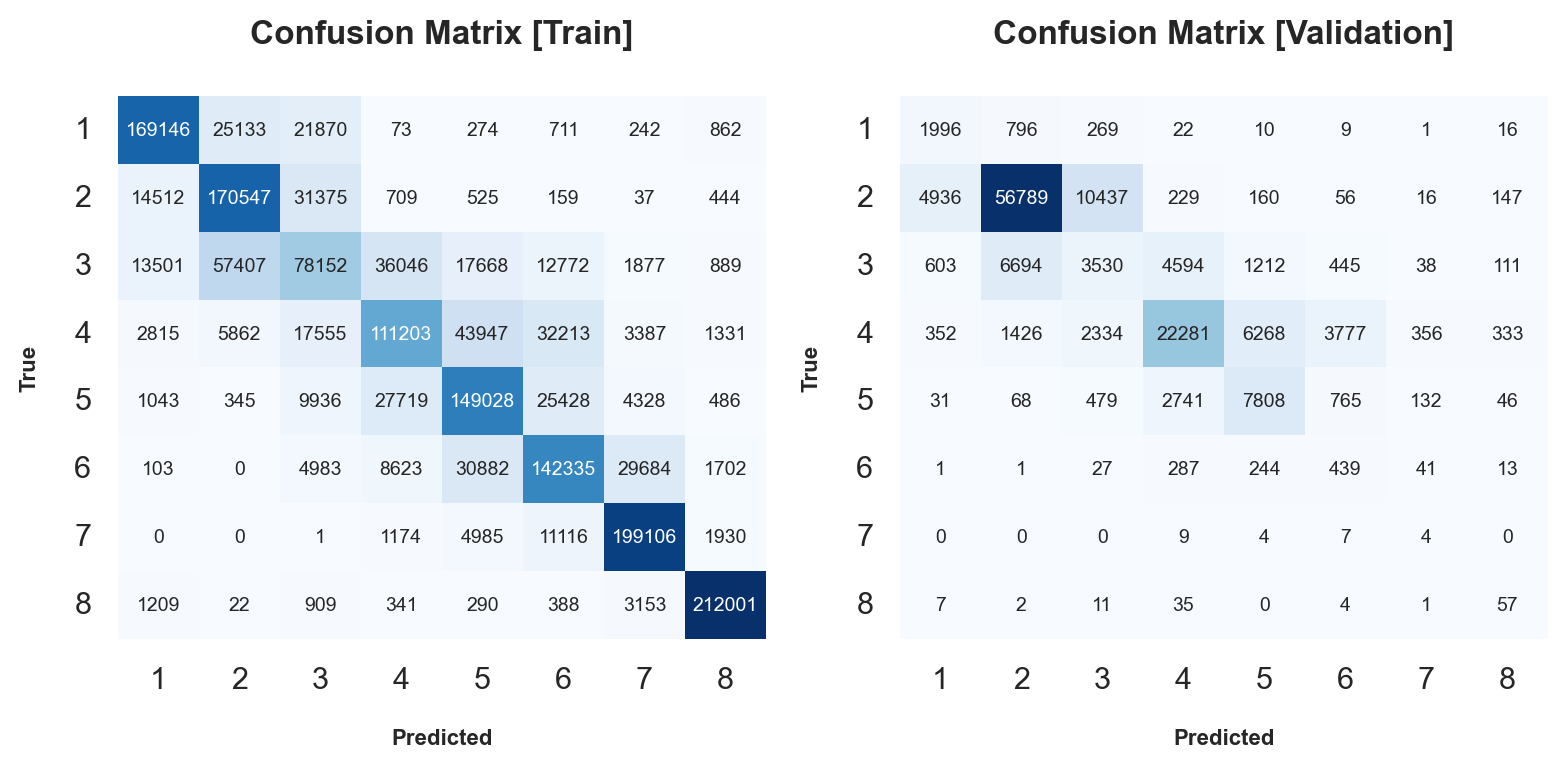

Running Model: KNN:  17%|███████▏                                   | 1/6 [1:41:03<8:25:19, 6063.83s/it, next_model=NN]

Model: LR         | Time: 6043.02s -- Accuracy (Train/Val): 0.71 | 0.65 -- Precision (Train/Val): 0.7 | 0.34 -- Recall (Train/Val): 0.71 | 0.49 -- F1 (Train/Val): 0.7 | 0.36 -- AUROC (Train/Val): 0.95 | 0.89


KNN

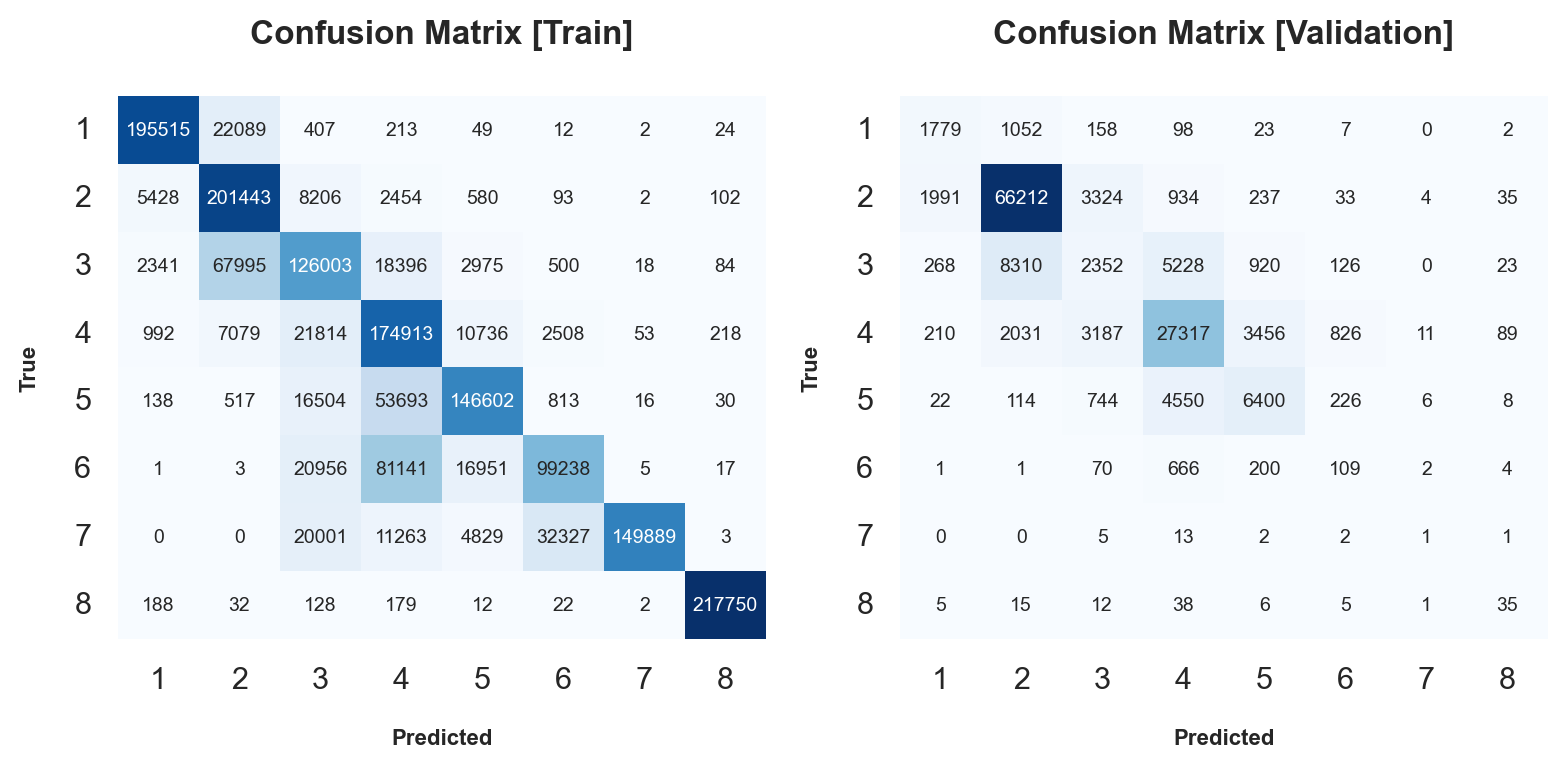

Running Model: NN:  33%|█████████████▋                           | 2/6 [5:31:11<11:47:56, 10619.21s/it, next_model=Bag]

Model: KNN        | Time: 1.09s -- Accuracy (Train/Val): 0.75 | 0.73 -- Precision (Train/Val): 0.78 | 0.38 -- Recall (Train/Val): 0.75 | 0.42 -- F1 (Train/Val): 0.75 | 0.39 -- AUROC (Train/Val): 0.95 | 0.77
Iteration 1, loss = 0.78125189
Iteration 2, loss = 0.68983188
Iteration 3, loss = 0.67511794
Iteration 4, loss = 0.66614068
Iteration 5, loss = 0.66061199
Iteration 6, loss = 0.65703012
Iteration 7, loss = 0.65387754
Iteration 8, loss = 0.65107110
Iteration 9, loss = 0.64882745
Iteration 10, loss = 0.64644616
Iteration 11, loss = 0.64422561
Iteration 12, loss = 0.64304174
Iteration 13, loss = 0.64230439
Iteration 14, loss = 0.64158790
Iteration 15, loss = 0.64103446
Iteration 16, loss = 0.64050941
Iteration 17, loss = 0.64005590
Iteration 18, loss = 0.63935304
Iteration 19, loss = 0.63909710
Iteration 20, loss = 0.63876763
Iteration 21, loss = 0.63823478
Iteration 22, loss = 0.63798582
Iteration 23, loss = 0.63781997
Iteration 24, loss = 0.63756366
Iteration 25, loss = 0.63725118
It

NN

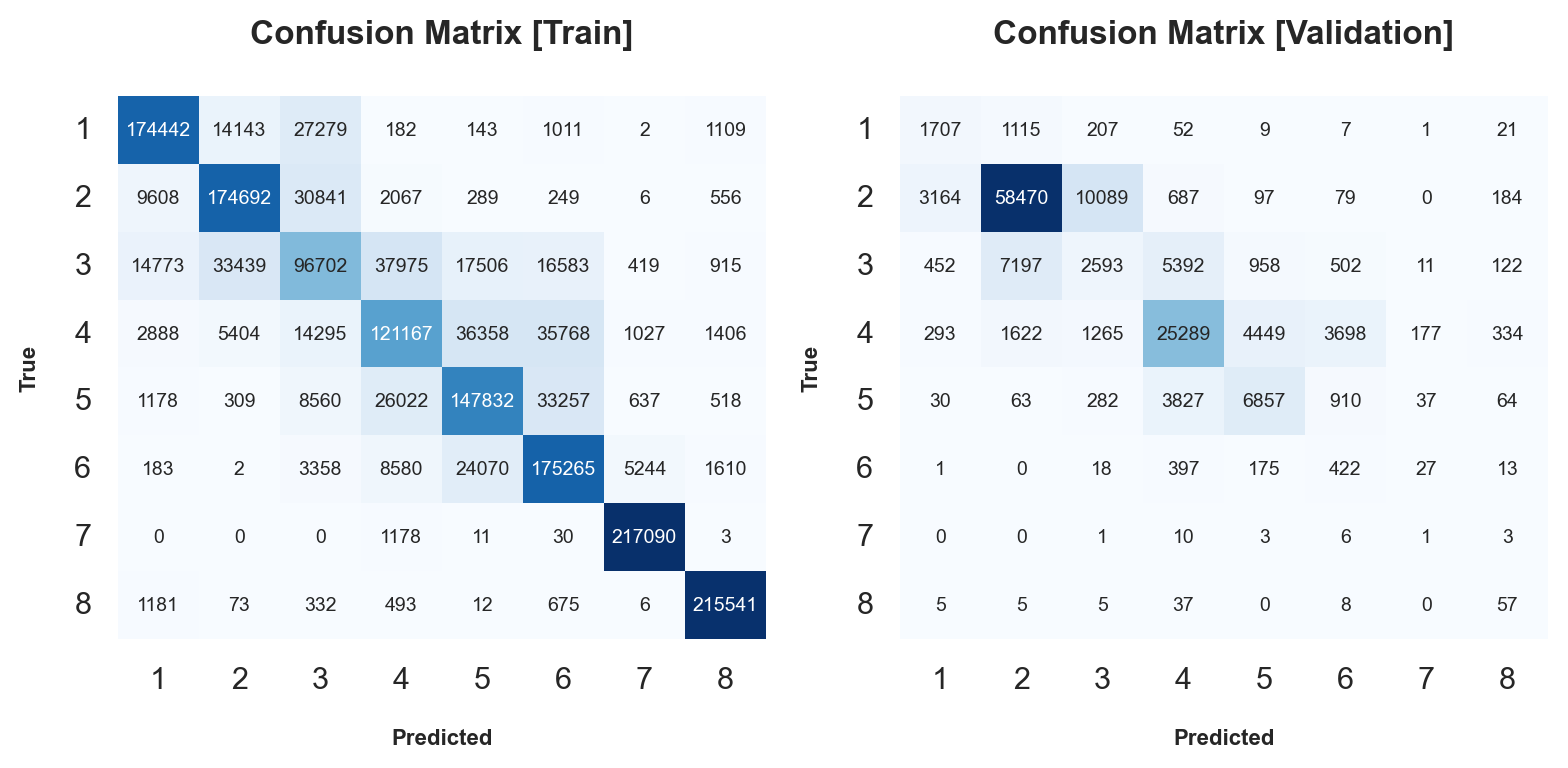

Running Model: Bag:  50%|█████████████████████                     | 3/6 [5:57:11<5:24:07, 6482.53s/it, next_model=Cat]

Model: NN         | Time: 1540.57s -- Accuracy (Train/Val): 0.76 | 0.66 -- Precision (Train/Val): 0.75 | 0.34 -- Recall (Train/Val): 0.76 | 0.46 -- F1 (Train/Val): 0.75 | 0.36 -- AUROC (Train/Val): 0.96 | 0.89


Bag

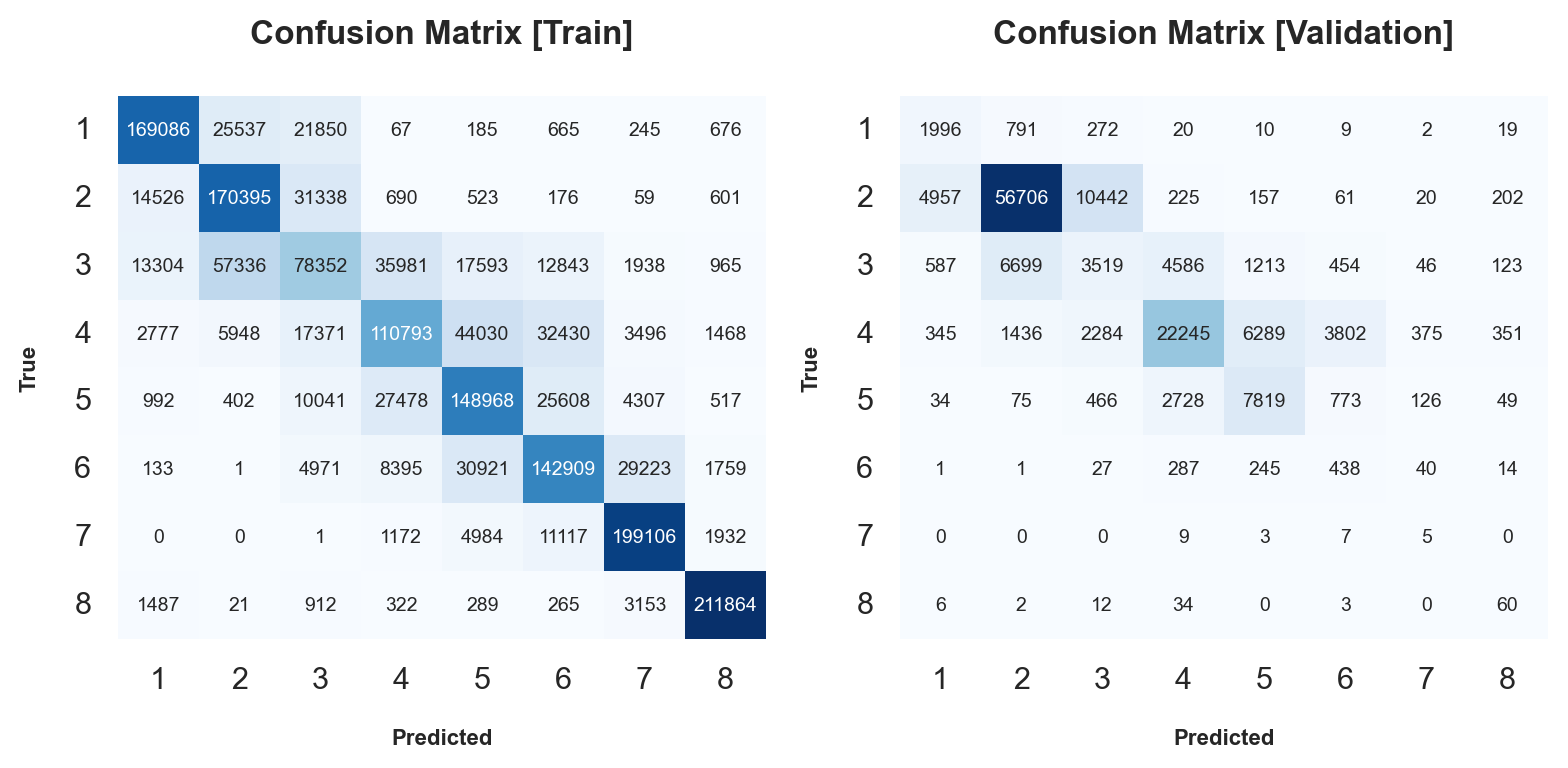

Running Model: Cat:  67%|████████████████████████▋            | 4/6 [8:04:20<3:51:10, 6935.05s/it, next_model=Stacking]

Model: Bag        | Time: 7419.21s -- Accuracy (Train/Val): 0.71 | 0.65 -- Precision (Train/Val): 0.7 | 0.34 -- Recall (Train/Val): 0.71 | 0.5 -- F1 (Train/Val): 0.7 | 0.36 -- AUROC (Train/Val): 0.95 | 0.89
Learning rate set to 0.301478
0:	learn: 1.4196462	test: 1.4199189	best: 1.4199189 (0)	total: 1.19s	remaining: 1m 57s
1:	learn: 1.2127488	test: 1.2134376	best: 1.2134376 (1)	total: 2.23s	remaining: 1m 49s
2:	learn: 1.0953648	test: 1.0957423	best: 1.0957423 (2)	total: 3.21s	remaining: 1m 43s
3:	learn: 1.0159920	test: 1.0158817	best: 1.0158817 (3)	total: 4.22s	remaining: 1m 41s
4:	learn: 0.9527854	test: 0.9528686	best: 0.9528686 (4)	total: 5.27s	remaining: 1m 40s
5:	learn: 0.9050318	test: 0.9049425	best: 0.9049425 (5)	total: 6.29s	remaining: 1m 38s
6:	learn: 0.8716605	test: 0.8714023	best: 0.8714023 (6)	total: 7.25s	remaining: 1m 36s
7:	learn: 0.8434622	test: 0.8430985	best: 0.8430985 (7)	total: 8.26s	remaining: 1m 34s
8:	learn: 0.8196595	test: 0.8192355	best: 0.8192355 (8)	total: 9.27

Cat

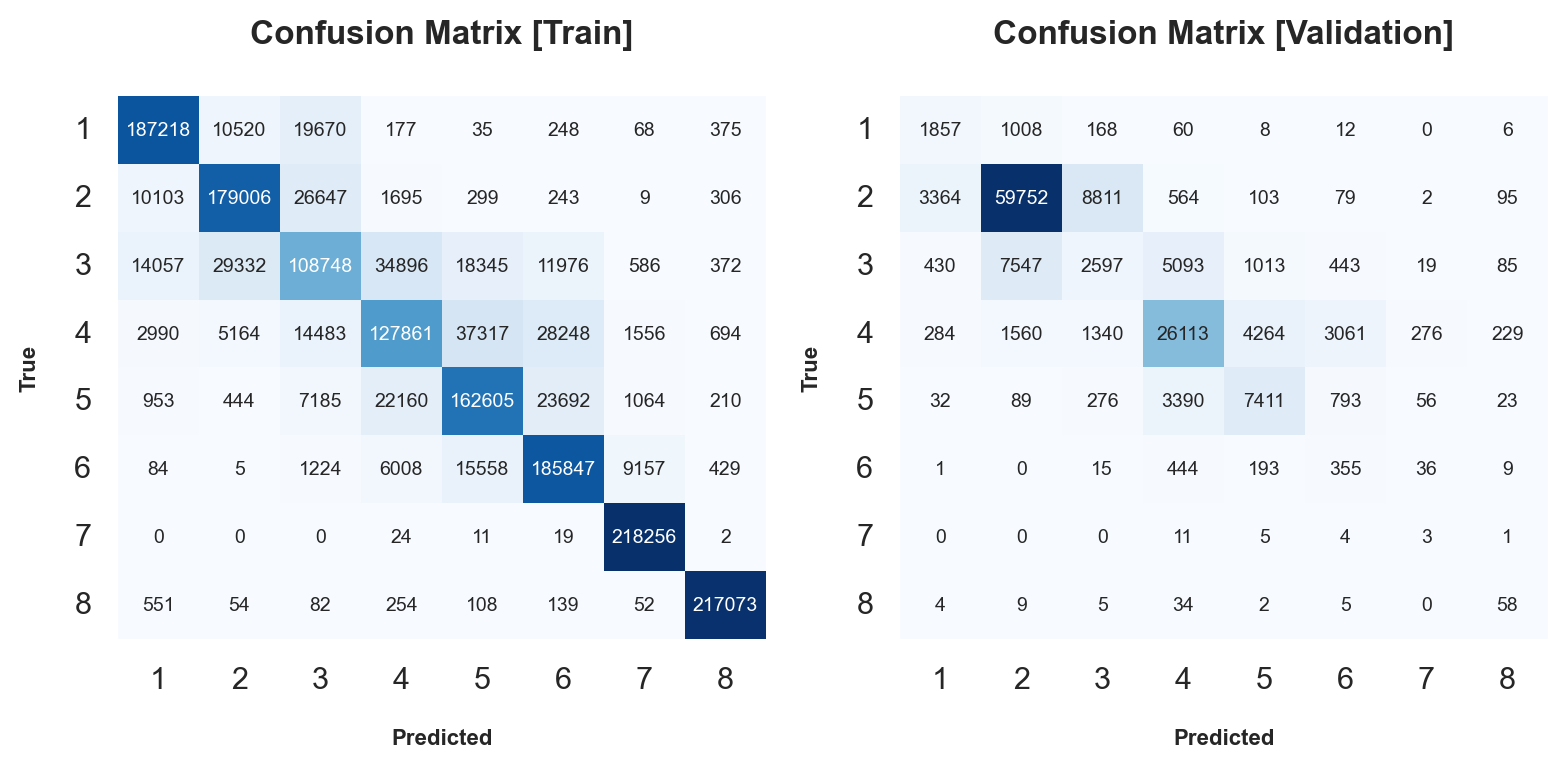

Running Model: Stacking:  83%|██████████████████████████▋     | 5/6 [8:06:15<1:14:35, 4475.61s/it, next_model=Done! :)]

Model: Cat        | Time: 101.0s -- Accuracy (Train/Val): 0.79 | 0.68 -- Precision (Train/Val): 0.79 | 0.36 -- Recall (Train/Val): 0.79 | 0.48 -- F1 (Train/Val): 0.79 | 0.38 -- AUROC (Train/Val): 0.97 | 0.91


Stacking

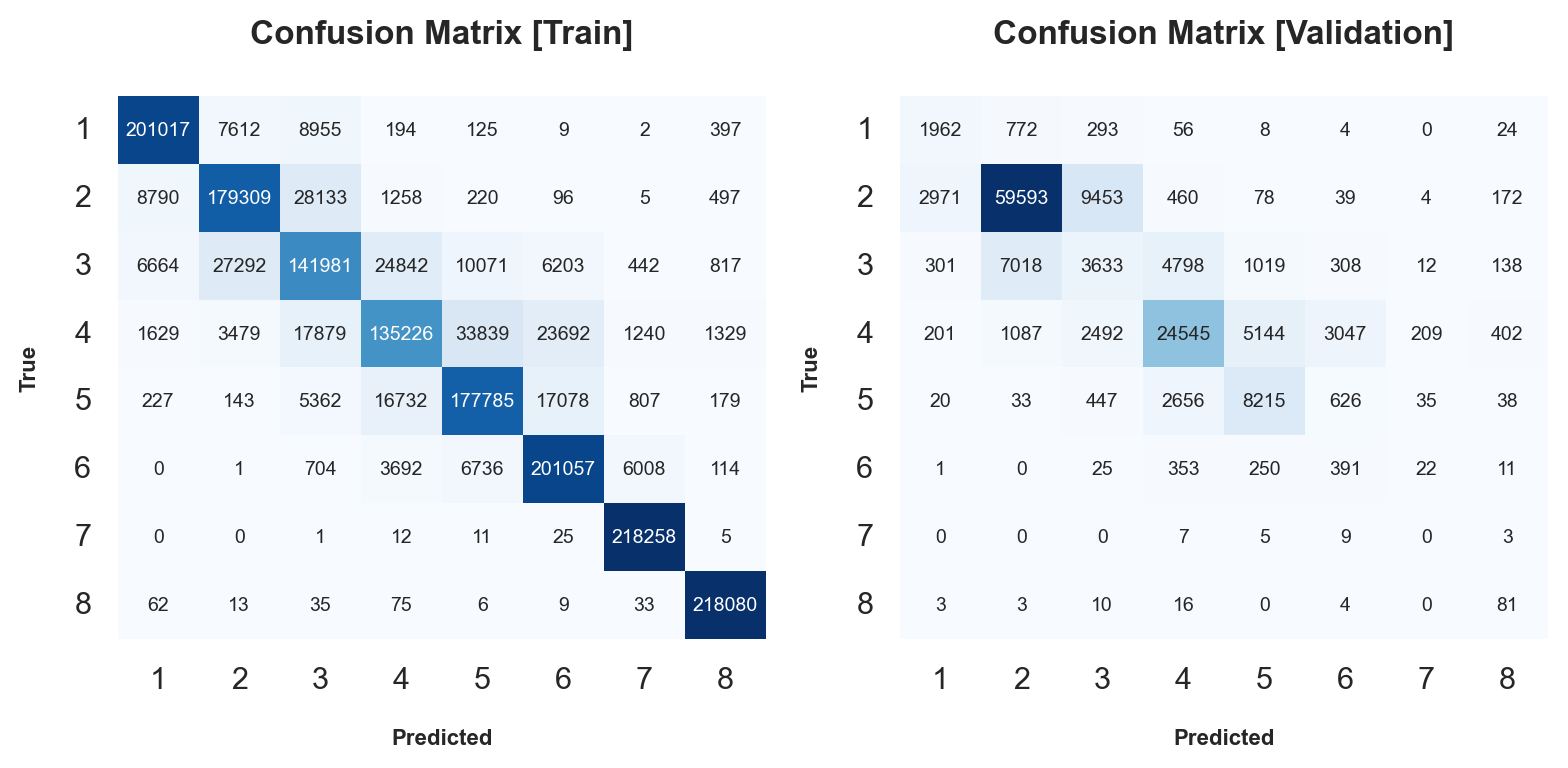

Running Model: Stacking: 100%|█████████████████████████████████| 6/6 [12:27:04<00:00, 7470.80s/it, next_model=Done! :)]

Model: Stacking   | Time: 14441.73s -- Accuracy (Train/Val): 0.84 | 0.69 -- Precision (Train/Val): 0.84 | 0.37 -- Recall (Train/Val): 0.84 | 0.51 -- F1 (Train/Val): 0.84 | 0.39 -- AUROC (Train/Val): 0.98 | 0.89


Classification Metrics Training Data 
 
 
 
 Time of Execution 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 LR 
 6043.02 
 0.71 
 0.70 
 0.71 
 0.70 
 0.95 
 
 
 KNN 
 1.09 
 0.75 
 0.78 
 0.75 
 0.75 
 0.95 
 
 
 NN 
 1540.57 
 0.76 
 0.75 
 0.76 
 0.75 
 0.96 
 
 
 Bag 
 7419.21 
 0.71 
 0.70 
 0.71 
 0.70 
 0.95 
 
 
 Cat 
 101.00 
 0.79 
 0.79 
 0.79 
 0.79 
 0.97 
 
 
 Stacking 
 14441.73 
 0.84 
 0.84 
 0.84 
 0.84 
 0.98 
 
 
 Validation Data 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 
 
 LR 
 0.65 
 0.34 
 0.49 
 0.36 
 0.89 
 
 
 KNN 
 0.73 
 0.38 
 0.42 
 0.39 
 0.77 
 
 
 NN 
 0.66 
 0.34 
 0.46 
 0.36 
 0.89 
 
 
 Bag 
 0.65 
 0.34 
 0.50 
 0.36 
 0.89 
 
 
 Cat 
 0.68 
 0.36 
 0.48 
 0.38 
 0.91 
 
 
 Stacking 
 0.69 
 0.37 
 0.51 
 0.39 
 0.89

In [85]:
# For loop to run all models | Hold-out Validation
models_results_train = {}
models_results_val = {}


# models = ['LR', 'NB_G', 'NB_C', 'KNN', 'NN', 'DT', 'RF', 'Bag', 'Cat', 'ExtraTrees', 'Stacking']  # List with all models to run [Original Data]

# For loop to run all models | Hold-out Validation [With Scaling]
models = ['LR', 'KNN', 'NN', 'Bag', 'Cat', 'Stacking']           # List with the models that need scaling
# Loop through the models and print progress bar with tqdm
# Source: https://stackoverflow.com/questions/37506645/can-i-add-message-to-the-tqdm-progressbar
loop_obj = tqdm(enumerate(models), total=len(models))
for idx, model_name in loop_obj:
    
    loop_obj.set_description(f'Running Model: {model_name}')
    
    # Check if there's a next model
    next_model = models[idx + 1] if idx + 1 < len(models) else " Done! :)"
    loop_obj.set_postfix(next_model = f'{next_model}')
    
    # Run the classification model and calculate 'Time of Execution' for each model [Hold-out Validation]
    
    # Avoid errors for the models that don't support negative values
    try:
        begin = time.perf_counter()
        # model = run_classification_model(model_name, X_train, y_train)                           # Original Data [André]
        # model = run_classification_model(model_name, X_train_norm, y_train)                      # MinMaxScaler [Zofia]
        # model = run_classification_model(model_name, X_train_stand, y_train)                     # StandardScaler [João]
        # model = run_classification_model(model_name, X_train_robust_scaled, y_train)             # RobustScaler [Simone]
        
        # model = run_classification_model(model_name, X_train_smote, y_train_smote)               # KMeansSMOTE (W/o Scaling) [André]
        # model = run_classification_model(model_name, X_train_smote_norm, y_train_smote)          # KMeansSMOTE (MinMaxScaler) [Steven]
        # model = run_classification_model(model_name, X_train_smote_stand, y_train_smote)         # KMeansSMOTE (StandardScaler) [João]
        model = run_classification_model(model_name, X_train_smote_robust_scaled, y_train_smote) # KMeansSMOTE (RobustScaler) [Simone]
        end = time.perf_counter()
        
    except ValueError as e:
        print(f"Error: {e}")
        continue
    
    # Calculate the time of execution
    time_execution = round(end - begin, 2)
    
    # Calculate the classification metrics    
    train_metrics, val_metrics = classification_metrics(model_name, model, time_execution,                                               ###################### CHANGE TO THE BEST SCALER
                                                        # X_train, X_val, y_train, y_val,                                                # Original Data
                                                        # X_train_norm, X_val_norm, y_train, y_val,                                      # MinMaxScaler
                                                        # X_train_stand, X_val_stand, y_train, y_val,                                    # StandardScaler
                                                        # X_train_robust_scaled, X_val_robust_scaled, y_train, y_val,                    # RobustScaler
                                                        
                                                        # X_train_smote, X_val, y_train_smote, y_val,                                    # KMeansSMOTE (W/o Scaling)
                                                        # X_train_smote_norm, X_val_smote_norm, y_train_smote, y_val,                    # KMeansSMOTE (MinMaxScaler)
                                                        # X_train_smote_stand, X_val_smote_stand, y_train_smote, y_val,                  # KMeansSMOTE (StandardScaler)
                                                        X_train_smote_robust_scaled, X_val_smote_robust_scaled, y_train_smote, y_val,  # KMeansSMOTE (RobustScaler)
                                                        classification_report_show=False)
    
    # Add the metrics to the results dictionary
    models_results_train.update(train_metrics)
    models_results_val.update(val_metrics)
    
    # Calculate average metrics for the model
    avg_accuracy_train = train_metrics[model_name]['Accuracy']
    avg_accuracy_val = val_metrics[model_name]['Accuracy']
    avg_precision_train = train_metrics[model_name]['Precision']
    avg_precision_val = val_metrics[model_name]['Precision']
    avg_recall_train = train_metrics[model_name]['Recall']
    avg_recall_val = val_metrics[model_name]['Recall']
    avg_f1_train = train_metrics[model_name]['F1 Score']
    avg_f1_val = val_metrics[model_name]['F1 Score']
    avg_auc_train = train_metrics[model_name]['AUROC']
    avg_auc_val = val_metrics[model_name]['AUROC']
    
    # Print the results of the model
    print(f"Model: {model_name:<10} | Time: {time_execution}s -- "
          f"Accuracy (Train/Val): {avg_accuracy_train} | {avg_accuracy_val} -- "
          f"Precision (Train/Val): {avg_precision_train} | {avg_precision_val} -- "
          f"Recall (Train/Val): {avg_recall_train} | {avg_recall_val} -- "
          f"F1 (Train/Val): {avg_f1_train} | {avg_f1_val} -- "
          f"AUROC (Train/Val): {avg_auc_train} | {avg_auc_val}")

# Display the results of the models
display_side_by_side(pd.DataFrame(models_results_train).T, 
                     pd.DataFrame(models_results_val).T, 
                     titles=['Training Data', 'Validation Data'],
                     super_title='Classification Metrics')

## Time of Execution = Xmin Xs

In [86]:
# Save the results in a Excel file
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

df_results_train.index.name = 'Model'
df_results_val.index.name = 'Model'

df_results_train.to_excel('Robust_Models_Results_07.12.2024.xlsx',sheet_name='Train')         ################# Change the day
df_results_val.to_excel('Robust_Models_Results_07.12.2024.xlsx',sheet_name='Validation')      ################# Change the day

In [ ]:
# # Cell to run just one model [Exemplification of how to use the functions]
# model_name = 'NN'

# begin = time.perf_counter()
# model = run_classification_model(model_name, X_train_norm, y_train, verbose=True)            # MinMaxScaler
# # model = run_classification_model(model_name, X_train_stand, y_train, verbose=True)         # StandardScaler
# # model = run_classification_model(model_name, X_train_robust_scaled, y_train, verbose=True) # RobustScaler
# end = time.perf_counter()


# models_results_train, models_results_val = classification_metrics(model_name, model, round(end - begin,2),
#                                                                   X_train_norm, X_val_norm, y_train, y_val,       # MinMaxScaler
#                                                                   # X_train_stand, X_val_stand, y_train, y_val,     # StandardScaler
#                                                                   # X_train_robust_scaled, X_val_robust_scaled, y_train, y_val, # RobustScaler
#                                                                   classification_report_show=True)

# # Display the results of the models
# display_side_by_side(pd.DataFrame(models_results_train).T,
#                      pd.DataFrame(models_results_val).T, 
#                      titles=['Training Data', 'Validation Data'],
#                      super_title='Classification Metrics')

The error is calculated by quantifying the difference between the predicted output and the desired output. This difference is called "loss" and the function used to calculate the difference is called the "loss function". In this case, the model is optimized by using the log-loss function / cross-entropy:

**$$\text{log\_loss} = -\frac{1}{N}\sum_{N}^{i=1}y_{i}\cdot log(p(y_{i}))\cdot log(1-p(y_{i}))$$**

where $y$ is the label and $p(y)$ is the predicted probability of the point being 1 for all N points.

In [ ]:
# # Plot the loss through the iterations by calling the attribute 'loss_curve_'
# plt.figure(figsize=(6, 6))
# plt.plot(model.loss_curve_, label='Loss Curve', color=palette[2])
# plt.title('Loss Curve\n', fontsize=16, fontweight='bold')
# plt.xlabel('Iterations\n', fontsize=14, fontweight='bold')
# plt.ylabel('Loss\n', fontsize=14, fontweight='bold')
# plt.tight_layout()
# sns.despine(right=True, top=True)
# plt.show()

---

In [ ]:
# # Cell to run just one model
# model_name = 'LR'

# begin = time.perf_counter()
# # model = run_classification_model(model_name, X_train_norm, y_train, verbose=True)          # MinMaxScaler
# # model = run_classification_model(model_name, X_train_stand, y_train, verbose=True)         # StandardScaler
# # model = run_classification_model(model_name, X_train_robust_scaled, y_train, verbose=True) # RobustScaler
# end = time.perf_counter()


# models_results_train, models_results_val = classification_metrics(model_name, model, round(end - begin,2),
#                                                                   # X_train_norm, X_val_norm, y_train, y_val,       # MinMaxScaler
#                                                                   # X_train_stand, X_val_stand, y_train, y_val,     # StandardScaler
#                                                                   # X_train_robust_scaled, X_val_robust_scaled, y_train, y_val, # RobustScaler
#                                                                   classification_report_show=True)

# # Display the results of the models
# display_side_by_side(pd.DataFrame(models_results_train).T,
#                      pd.DataFrame(models_results_val).T, 
#                      titles=['Training Data', 'Validation Data'],
#                      super_title='Classification Metrics')

---

> Given the fact that **`XXX`** were a classification model that yielded the best results (along with **`Neural Networks`** and **`Logistic Regression`**), we decided to try out a few **Ensemble Methods** that have **`Decision Trees`** as base learners

<div class="alert alert-block alert-warning" style="font-size:25px; font-weight: bold;">

[NOTE] We need to check the results of the models and choose the best one to optimize

</div>

---

### <a class='anchor' id='3_1'></a> **🧪 Model Selection**

---

### <a class='anchor' id='3_2'></a> **📏 Model Evaluation**

In [ ]:
# [To be continued...]

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

#### **K-Nearest Neighbors [KNN] (11/11/2024)**

In [111]:
# Combine train and validation datasets
# X_combined = np.concatenate([X_train, X_val])                                  # Original Data
# X_combined = np.concatenate([X_train_norm, X_val_norm])                      # MinMaxScaler
# X_combined = np.concatenate([X_train_stand, X_val_stand])                    # StandardScaler
X_combined = np.concatenate([X_train_smote_robust_scaled, X_val_smote_robust_scaled])    # RobustScaler
y_combined = np.concatenate([y_train_smote, y_val])

# Create a test fold index (-1 for train, 0 for validation)
test_fold = [-1] * len(X_train) + [0] * len(X_val)

print('Test fold: ', len(test_fold))
print('X_combined: ', len(X_combined))
print('y_combined: ', len(y_combined))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

Test fold:  574026
X_combined:  1890001
y_combined:  1890001


In [ ]:
# Hyperparameters to be optimized
param_grid = {
    'n_neighbors': list(range(1, 20)),
    'p': [1,2,3],    
}

# Grid Search w/ Cross Validation
grid_search = GridSearchCV(estimator= KNeighborsClassifier(algorithm='auto', weights='uniform'),         # Model
                           param_grid=param_grid,   # Hyperparameters
                           cv=ps,                   # PredefinedSplit                          
                           scoring='f1_macro',      # Metric to optimize
                           n_jobs=-1,             # Use all processors (parallelize the execution -> possible to be faster)
                                                    # For some reason, the parallelization is not working properly for Windows PC
                           return_train_score=True, # Return the training score
                           verbose=10)              # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
                                                    #                 - > 2 : the score is also displayed; > 3 : the fold and candidate parameter indexes are also displayed)
                                                    
# Train the GridSearchCV
grid_search.fit(X_train_smote_robust_scaled, y_train_smote)

# Results of the Grid Search
best_params = grid_search.best_params_           # Best hyperparameters
best_score = grid_search.best_score_             # Best Score
best_estimator = grid_search.best_estimator_     # Best Estimator

print('------------------------------------------------------------------------------------------------------------------------')
print('\033[1mBest Parameters:\033[0m\n', best_params)
print('\033[1mBest Average Score:\033[0m\n', best_score)
print('\033[1mBest Estimator:\033[0m\n', best_estimator)
print('------------------------------------------------------------------------------------------------------------------------')

# Plot the results of the Grid Search
# Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearch

# All results of the Grid Search
grid_mean_scores_means = grid_search.cv_results_['mean_test_score']
grid_mean_scores_stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(grid_mean_scores_means, grid_mean_scores_stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

## Time of Execution Grid Search Cross Validation = Xm Xs

Fitting 1 folds for each of 57 candidates, totalling 57 fits


In [ ]:
# Save the optimization results in a Excel file
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.to_excel('Robust_GridSearch_KNN_Results_07.12.2024.xlsx')                ################# Change the day

In [ ]:
# Best model with the best hyperparameters
best_knn = best_estimator   # Model with the best hyperparameters

# Classification Metrics & Confusion Matrix for 'distance' model
classification_metrics(
    'KNN | KNeighborksClassifier (Optimized)', best_knn, round(end - begin,2),
    X_train_smote_robust_scaled, X_val_smote_robust_scaled, y_train_smote, y_val,
    classification_report_show=True,
    confusion_matrix_show=True
)
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val,
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Best Model with Grid Search Cross-Validation (K Neighbors Classifier)')

In [ ]:
# Optimizing the hyperparameters of the best model
# ------------------------------------------- [Grid Search Cross Validation] -------------------------------------------
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Hyperparameters to be optimized
param_grid = 


# # Grid Search w/ Cross Validation
# grid_search = GridSearchCV(KNeighborsClassifier(algorithm='auto', n_neighbors=12, p=2, weights='uniform'),               # Model
#                            param_grid = param_grid,              # Hyperparameters
#                            cv=3,                    # Cross-Validation with 3 folds                         
#                            scoring='f1_macro',      # Metric to optimize
#                            # n_jobs=-1,               # Use all processors (parallelize the execution -> possible to be faster)
#                            #                          For some reason, the parallelization is not working properly for Windows PC
#                            return_train_score=True, # Return the training score
#                            verbose=10)              # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
#                                                     #                 - > 2 : the score is also displayed; > 3 : the fold and candidate parameter indexes are also displayed)

# # # Train the GridSearchCV
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# best_estimator = grid_search.best_estimator_

# print('Best Hyperparameters:\n', best_params)
# print('Best Score:\n', best_score)
# print('Best Estimator:\n', best_estimator)

# ## Time of Execution Grid Search Cross Validation = 342m 56s ~5h 43m

```console
Fitting 3 folds for each of 38 candidates, totalling 114 fits

Best Hyperparameters:
 {'n_neighbors': 12, 'p': 2}
Best Score:
 0.369028253496106
Best Estimator:
 KNeighborsClassifier(n_neighbors=12)
```

In [ ]:
# # Save the optimization results in a Excel file
# df_results = pd.DataFrame(grid_search.cv_results_)
# df_results.to_excel('./[ML]_Project_EDAOutputs_Group33/Modeling/GridSearch_Results_11.11.2024.xlsx')                ################# Change the day

In [ ]:
# # Plot the results of the Grid Search
# # Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearchcv

# # All results of the Grid Search
# grid_mean_scores_means = grid_search.cv_results_['mean_test_score']
# grid_mean_scores_stds = grid_search.cv_results_['std_test_score']
# for mean, std, params in zip(grid_mean_scores_means, grid_mean_scores_stds, grid_search.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

In [ ]:
# # Preparing data for plotting
# p_values = [1, 2]
# accuracy_means_p1 = grid_mean_scores_means[::2]
# accuracy_means_p2 = grid_mean_scores_means[1::2]

# # Plot the results of the Grid Search - Best K
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, accuracy_means_p1, label=rf"$\mathbf{{p=1}}$ (Manhattan Distance)", color='#2171B5', marker='o', markersize=5)
# plt.plot(k_range, accuracy_means_p2, label=rf"$\mathbf{{p=2}}$ (Euclidean Distance)", color='#4292C6', marker='s', markersize=5)

# # Adding labels and title
# plt.xlabel('\nValue of K for KNN', fontsize=12, fontweight='bold')
# plt.ylabel('Cross-Validated | F1 Score (Macro)\n', fontsize=12, fontweight='bold')
# plt.title('Grid Search Cross-Validation Results | Best K\n', fontsize=16, fontweight='bold')

# # Customizing the plot
# plt.legend(title="Distance Metric", loc='center right', fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'}, frameon=False)
# plt.xticks(k_range)

# sns.despine(right=True, top=True)
# plt.savefig('./[ML]_Project_EDAOutputs_Group33/Modeling/Grid_Search_CV_Best_K_11.11.2024.png', dpi=200, bbox_inches='tight')
# plt.show()

---

#### **MLPClassifier [Neural Network]**

In this implementation of the **`GridSearchCV`** method, we used **`PredefinedSplit`** to split the data into training and validation sets. 

- This method is used to avoid data leakage, as the data is already split into training and validation sets.
- The **`PredefinedSplit`** class receives a list of indices that will be used to split the data.

> **1.** Concatenate the training and validation data. <br>
> **2.** Create a **`PredefinedSplit`** object and pass the indices of the training data to it. [**`-1`** for the training data and **`0`** for the validation data]. <br>
> **3.** Pass the **`PredefinedSplit`** object to the **`cv`** parameter of the **`GridSearchCV`** class. <br>
> **4.** Fit the **`GridSearchCV`** object to the concatenated data. <br>
> **5.** Check the best parameters of the model. <br>

In [98]:
# Combine train and validation datasets
# X_combined = np.concatenate([X_train, X_val])                                  # Original Data
# X_combined = np.concatenate([X_train_norm, X_val_norm])                      # MinMaxScaler
# X_combined = np.concatenate([X_train_stand, X_val_stand])                    # StandardScaler
X_combined = np.concatenate([X_train_smote_robust_scaled, X_val_smote_robust_scaled])    # RobustScaler
y_combined = np.concatenate([y_train_smote, y_val])

# Create a test fold index (-1 for train, 0 for validation)
test_fold = [-1] * len(X_train) + [0] * len(X_val)

print('Test fold: ', len(test_fold))
print('X_combined: ', len(X_combined))
print('y_combined: ', len(y_combined))

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

Test fold:  574026
X_combined:  1890001
y_combined:  1890001


In [102]:
# Hyperparameters to be optimized
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,100), (150,150),(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 75, 100],    
}

# Grid Search w/ Cross Validation
grid_search = GridSearchCV(estimator= MLPClassifier(activation='relu', solver='adam', learning_rate='adaptive', 
                                                    tol = 1e-3, verbose = 1, random_state=2024),         # Model
                           param_grid=param_grid,   # Hyperparameters
                           cv=ps,                   # PredefinedSplit                          
                           scoring='f1_macro',      # Metric to optimize
                           # n_jobs=-1,             # Use all processors (parallelize the execution -> possible to be faster)
                                                    # For some reason, the parallelization is not working properly for Windows PC
                           return_train_score=True, # Return the training score
                           verbose=10)              # Print messages (- > 1 : the computation time for each fold and parameter candidate is displayed;
                                                    #                 - > 2 : the score is also displayed; > 3 : the fold and candidate parameter indexes are also displayed)
                                                    
# Train the GridSearchCV
grid_search.fit(X_train_smote_robust_scaled, y_train_smote)

# Results of the Grid Search
best_params = grid_search.best_params_           # Best hyperparameters
best_score = grid_search.best_score_             # Best Score
best_estimator = grid_search.best_estimator_     # Best Estimator

print('------------------------------------------------------------------------------------------------------------------------')
print('\033[1mBest Parameters:\033[0m\n', best_params)
print('\033[1mBest Average Score:\033[0m\n', best_score)
print('\033[1mBest Estimator:\033[0m\n', best_estimator)
print('------------------------------------------------------------------------------------------------------------------------')

# Plot the results of the Grid Search
# Source: https://www.kaggle.com/code/melihkanbay/knn-best-parameters-gridsearch

# All results of the Grid Search
grid_mean_scores_means = grid_search.cv_results_['mean_test_score']
grid_mean_scores_stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(grid_mean_scores_means, grid_mean_scores_stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

## Time of Execution Grid Search Cross Validation = Xm Xs

Fitting 1 folds for each of 18 candidates, totalling 18 fits
[CV 1/1; 1/18] START hidden_layer_sizes=(50, 50), max_iter=50...................
Iteration 1, loss = 0.67509022
Iteration 2, loss = 0.62584814
Iteration 3, loss = 0.62010283
Iteration 4, loss = 0.61684313
Iteration 5, loss = 0.61484544
Iteration 6, loss = 0.61327643
Iteration 7, loss = 0.61199330
Iteration 8, loss = 0.61090891
Iteration 9, loss = 0.61018282
Iteration 10, loss = 0.60959466
Iteration 11, loss = 0.60915201
Iteration 12, loss = 0.60833699
Iteration 13, loss = 0.60798849
Iteration 14, loss = 0.60738938
Iteration 15, loss = 0.60706586
Iteration 16, loss = 0.60700680
Iteration 17, loss = 0.60653861
Iteration 18, loss = 0.60615233
Iteration 19, loss = 0.60608675
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
[CV 1/1; 1/18] END hidden_layer_sizes=(50, 50), max_iter=50;, score=(train=0.409, test=0.159) total time= 1.1min
[CV 1/1; 2/18] START hidden_layer_sizes=(50, 50), max_it

In [103]:
# Save the optimization results in a Excel file
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.to_excel('Robust_GridSearch_MLP_Results_07.12.2024.xlsx')                ################# Change the day

In [ ]:
# Preparing data for plotting
hidden_layer_sizes = [(100,100), (150,150),(150,100,50), (120,80,40), (100,50,30)]
activation = ['relu']
solver = ['sgd', 'adam']
alpha = [0.0001, 0.05]
learning_rate = ['adaptive']
learning_rate_init = [0.001, 0.05]

# Plot the results of the Grid Search - Best Hyperparameters
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes, grid_mean_scores_means[:10], label='hidden_layer_sizes', color='#2171B5', marker='o', markersize=5)
plt.plot(solver, grid_mean_scores_means[10:12], label='solver', color='#4292C6', marker='s', markersize=5)
plt.plot(alpha, grid_mean_scores_means[12:14], label='alpha', color='#2171B5', marker='o', markersize=5)
plt.plot(learning_rate, grid_mean_scores_means[14:16], label='learning_rate', color='#4292C6', marker='s', markersize=5)
plt.plot(learning_rate_init, grid_mean_scores_means[16:], label='learning_rate_init', color='#2171B5', marker='o', markersize=5)

# Adding labels and title
plt.xlabel('\nHyperparameters', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Validated | F1 Score (Macro)\n', fontsize=12, fontweight='bold')
plt.title('Grid Search Cross-Validation Results | Best Hyperparameters\n', fontsize=16, fontweight='bold')

# Customizing the plot
plt.legend(title="Hyperparameters", loc='center right', fontsize=10, title_fontproperties={'weight':'bold', 'size':'12'}, frameon=False)
plt.xticks(hidden_layer_sizes)

sns.despine(right=True, top=True)
plt.savefig('Robust_Grid_Search_CV_Best_Hyperparameters_MPL_07.12.2024.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# Best model with the best hyperparameters
best_mlp = best_estimator   # Model with the best hyperparameters

# Classification Metrics & Confusion Matrix for 'distance' model
classification_metrics(
    'Neural Network | Multi-Layer Perceptron (Optimized)', best_mlp, round(end - begin,2),
    X_train_smote_robust_scaled, X_val_smote_robust_scaled, y_train, y_val,
    classification_report_show=True,
    confusion_matrix_show=True
)
# Dataframe with the results of the models
df_results_train = pd.DataFrame(models_results_train).T
df_results_val = pd.DataFrame(models_results_val).T

# Display the results
display_side_by_side(df_results_train, df_results_val,
                     titles=['Training Set', 'Validation Set'],
                     super_title='Results of the Best Model with Grid Search Cross-Validation (Multi-Layer Perceptron)')

---

### 📊 **Feature Importance**

In [ ]:
# [To be continued...]

# mse_importance = DecisionTreeRegressor().fit(X_train, y_train).feature_importances_
# mae_importance = DecisionTreeRegressor(criterion='absolute_error').fit(X_train, y_train).feature_importances_

# zippy = pd.DataFrame(zip(mse_importance, mae_importance), columns = ['mse','mae'])
# zippy['col'] = X_train.columns
# tidy = zippy.melt(id_vars='col').rename(columns=str.title)
# tidy.sort_values(['Value'], ascending = False, inplace = True)

# plt.figure(figsize=(15,8))
# sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

---

## 🔮 **Test Data Prediction**

In [ ]:
# Best Model
# best_model = LogisticRegression(penalty= 'elasticnet', solver='saga', l1_ratio=0.5, C=0.1, max_iter=1000, class_weight='balanced', random_state=2024, n_jobs=-1) # Best Model
# best_model = CatBoostClassifier(iterations= 500, loss_function='MultiClass', random_state=2024) # Best Model
# best_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=2024) # Best Model


################################################################# 30.11.2024
# best_model = MLPClassifier(hidden_layer_sizes = (100, 50), max_iter = 100, alpha=0.0001, solver = 'adam', learning_rate_init = 0.001, activation = 'relu', 
#                               learning_rate = 'adaptive', tol = 1e-4, verbose = True, random_state=2024) ## 0.44 F1 Score (Macro) - Validation Robust Data
# best_model = LogisticRegression(solver='lbfgs', max_iter = 1000, random_state=2024, n_jobs=-1) ## 0.41 F1 Score (Macro) - Validation PowerTransformer Data

############## W/O Scaling ##############
# Fit best model with the whole data -> Train + Validation (Try to improve the model performance on the test data)
# best_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
# best_model.fit(X_train_smote, y_train_smote) # SMOTE
# best_model.fit(X_train_adasyn, y_train_adasyn) # ADASYN

# Predictions on the test_data
# pred_test = best_model.predict(test_data)


############## W/ RobustScaler ##############
# # Fit best model with the whole data -> Train + Validation (Try to improve the model performance on the test data)
# robust_scaler = RobustScaler().fit(pd.concat([X_train, X_val]))
# best_model.fit(pd.concat([pd.DataFrame(robust_scaler.transform(X_train), columns=X_train.columns),
#                           pd.DataFrame(robust_scaler.transform(X_val), columns=X_val.columns)]), pd.concat([y_train, y_val]))

# # Predictions on the test_data
# pred_test = best_model.predict(robust_scaler.transform(test_data))

                         
# Predictions on the test_data
pred_test = best_model.predict(power_transformer.transform(test_data.drop(columns=['Accident Date Year', 'Assembly Date Year', 'C-2 Date Year'])))

## Time of Execution (Best Model with GridSearch CS - Fit with Train+Validation & Test Data) = XXm XXs

In [ ]:
# Create a DataFrame with the 'ID' and the 'Predicted' columns
submission_data = pd.DataFrame({'Claim Identifier': test_data.index, 'Claim Injury Type': pred_test.squeeze()})  # If the data is a Series, use the 'squeeze' method to convert it to a DataFrame
submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)
submission_data

---

## 📋 **CSV Export - Submission**

In [ ]:
# Each submission in Kaggle should have different names and should have the version name in the following format 
# – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

# submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')    # 11.11.2024
submission_data.to_csv('Group33_Version02_07.12.2024.csv', index=False, header=True, sep=',')     # 30.11.2024

---

# **🏁 Interpretability and Explanability** [Open Ended-Section]

In [ ]:
# from lime import lime_tabular                                                                       ##################### [To be continued...]

# # Create the explainer
# explainer = lime_tabular.LimeTabularExplainer(X_train_robust_scaled, 
#                                               mode='classification', 
#                                               feature_names=X_train_robust_scaled.columns, 
#                                               class_names=claim_injury_type_dict_swapped.values(), 
#                                               random_state=2024)

# # Select a random observation
# observation = 0

# # Get the observation
# observation_data = X_train_robust_scaled.iloc[observation]

# # Get the prediction
# prediction = best_model.predict(observation_data.values.reshape(1, -1))[0]

# # Get the prediction probabilities
# prediction_probabilities = best_model.predict_proba(observation_data.values.reshape(1, -1))[0]

# # Get the local explanation
# explanation = explainer.explain_instance(observation_data, best_model.predict_proba)

# # Display the prediction and the probabilities
# print(f'Prediction: {claim_injury_type_dict_swapped[prediction]}')
# print('Probabilities:')
# for idx, (claim_injury_type, probability) in enumerate(zip(claim_injury_type_dict_swapped.values(), prediction_probabilities)):
#     print(f'{claim_injury_type}: {probability:.2f}')
    
# # Display the local explanation
# explanation.show_in_notebook()

---

# **🔵 Save Model (Pickle)** [Open Ended-Section]

In [ ]:
# Source: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# import pickle

# # Save the model to disk -> For use in Web Application (Open-Ended Section)
# filename = '../[ML]_WebApp_Group33/BestModel_11.11.2024.sav'
# pickle.dump(best_model, open(filename, 'wb'))

# [To be continued...]

---

# **🔗 Bibliography/References**

**[[0]](https://mitpress.mit.edu/9780262029445/fundamentals-of-machine-learning-for-predictive-data-analytics/)** Kelleher, J. D., Brian Mac Namee, & Aoife D'arcy. (2015). Fundamentals of machine learning for predictive data analytics : algorithms, worked examples, and case studies (pp. 460–480). The Mit Press.

**[[1]](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)** Scikit-Learn. (2022), "Logistic Regression." https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

**[[2]](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)** Scikit-Learn. (2022), "Naive Bayes." https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html

**[[3]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** Scikit-Learn. (2022), "K-Nearest Neighbors." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**[[3.1]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)** Scikit-Learn. (2022), "KNN - Brute Force." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html

**[[3.2]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)** Scikit-Learn. (2022), "KNN - KD Tree." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html

**[[3.3]](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html)** Scikit-Learn. (2022), "KNN - Ball Tree." https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.NearestNeighbors.html

**[[4]](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html)** Scikit-Learn. (2022), "Neural Network." https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html

**[[5]](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** Scikit-Learn. (2022), "Decision Tree." https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**[[6]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** Scikit-Learn. (2022), "Random Forest." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**[[7]](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)** Scikit-Learn. (2022), "Support Vector Machine." https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html

**[[8]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** Scikit-Learn. (2022), "Gradient Boosting." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

**[[9]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html)** Scikit-Learn. (2022), "Bagging." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html

**[[10]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)** Scikit-Learn. (2022), "AdaBoost." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

**[[11]](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)** CatBoost. (2022), "CatBoost." https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html

**[[12]](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html)** Scikit-Learn. (2022), "Stacking." https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html

<br>

---